In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
from metpy.plots import StationPlot
import numpy as np
from pint import UnitRegistry
import cmocean as cmo
import cmasher
import geopandas as gpd
from metpy.plots import MapPanel, PanelContainer, PlotGeometry
from cartopy import crs as ccrs

C:\Users\josia\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
## Data Preparation ##

In [3]:
A105 = pd.read_csv('/Users/josia/Desktop/Python/StickNet/105A_Data_Final.csv')
A106 = pd.read_csv('/Users/josia/Desktop/Python/StickNet/106A_Data_Final.csv')
p1 = pd.read_csv('/Users/josia/Desktop/Python/NSSL Internship/Data/P1/5s_AVG_P1_Variables.csv')
p2 = pd.read_csv('/Users/josia/Desktop/Python/NSSL Internship/Data/P2/5s_AVG_P2_Variables.csv')

In [4]:
path = '/Users/josia/Desktop/Python/NSSL Internship/'
ureg = UnitRegistry()

In [5]:
A105['Theta_e'] = A105['Theta_e'].apply(ureg.parse_expression)
A106['Theta_e'] = A106['Theta_e'].apply(ureg.parse_expression)
p2['Theta_e'] = p2['Theta_e'].apply(ureg.parse_expression)

A105['Theta_v'] = A105['Theta_v'].apply(ureg.parse_expression)
A106['Theta_v'] = A106['Theta_v'].apply(ureg.parse_expression)
p2['Theta_v'] = p2['Theta_v'].apply(ureg.parse_expression)

A105['MSLP'] = A105['MSLP'].apply(ureg.parse_expression)
A106['MSLP'] = A106['MSLP'].apply(ureg.parse_expression)
p2['MSLP'] = p2['MSLP'].apply(ureg.parse_expression)

A105['storm_rel_u'] = A105['storm_rel_u'].apply(ureg.parse_expression)
A105['storm_rel_v'] = A105['storm_rel_v'].apply(ureg.parse_expression)

A106['storm_rel_u'] = A106['storm_rel_u'].apply(ureg.parse_expression)
A106['storm_rel_v'] = A106['storm_rel_v'].apply(ureg.parse_expression)

p2['storm_rel_u'] = p2['storm_rel_u'].apply(ureg.parse_expression)
p2['storm_rel_v'] = p2['storm_rel_v'].apply(ureg.parse_expression)

p2['Delta Theta_v'] = p2['Delta Theta_v'].apply(ureg.parse_expression)

A105['Baroclinic Generated Vorticity'] = A105['Baroclinic Generated Vorticity'].apply(ureg.parse_expression)
A106['Baroclinic Generated Vorticity'] = A106['Baroclinic Generated Vorticity'].apply(ureg.parse_expression)
p2['Baroclinic Generated Vorticity'] = p2['Baroclinic Generated Vorticity'].apply(ureg.parse_expression)

In [6]:
## Figure 1 ##

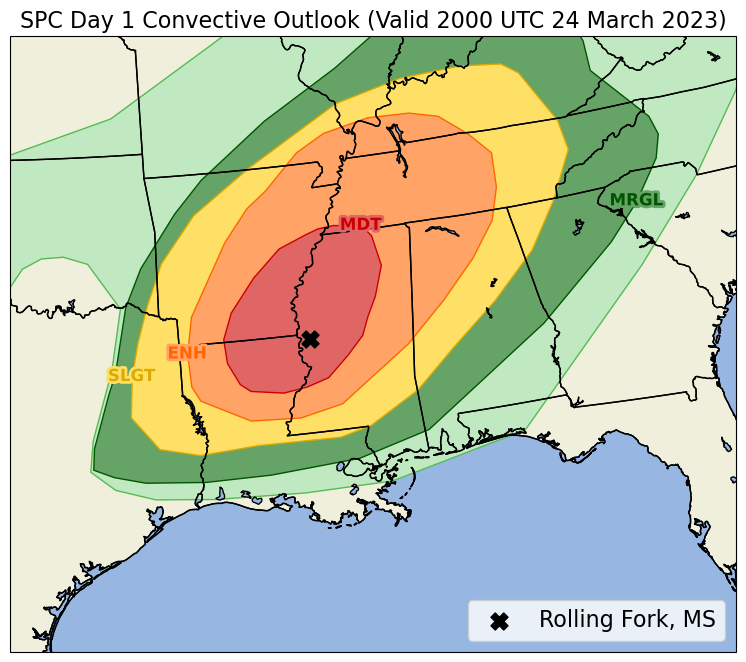

In [7]:
# Load the Day 1 outlook data
day1_outlook = gpd.read_file('/Users/josia/Desktop/Python/NSSL Internship/Data/2000RollingForkSPCconv.geoJSON')

# Set up the PlotGeometry with GeoPandas data
geo = PlotGeometry()
geo.geometry = day1_outlook['geometry']
geo.fill = day1_outlook['fill']
geo.stroke = day1_outlook['stroke']
geo.labels = day1_outlook['LABEL']
geo.label_fontsize = 'large'

# Create the map panel with MetPy
panel = MapPanel()
panel.title = 'SPC Day 1 Convective Outlook (Valid 2000 UTC 24 March 2023)'
panel.title_fontsize = 16
panel.plots = [geo]
panel.area = 'MS'  # Specify the area, e.g., Mississippi
panel.projection = 'lcc'
panel.layers = ['lakes', 'land', 'ocean', 'states', 'coastline', 'borders']

# Create the panel container
pc = PanelContainer()
pc.size = (12, 8)
pc.panels = [panel]

# Access the underlying axis from the panel
ax = panel.ax

# Coordinates for the point to add to the legend
x_coord = -90.878433  # Longitude
y_coord = 32.906208   # Latitude

# Scatter plot for the point with a label for the legend
ax.scatter(x_coord, y_coord, transform = ccrs.PlateCarree(), color = 'black', s = 150, 
           marker = 'X', label = 'Rolling Fork, MS', zorder = 5)

# Add the legend to the plot
ax.legend(loc='lower right', fontsize=16)
pc.show()

In [8]:
## Figure 2 ##

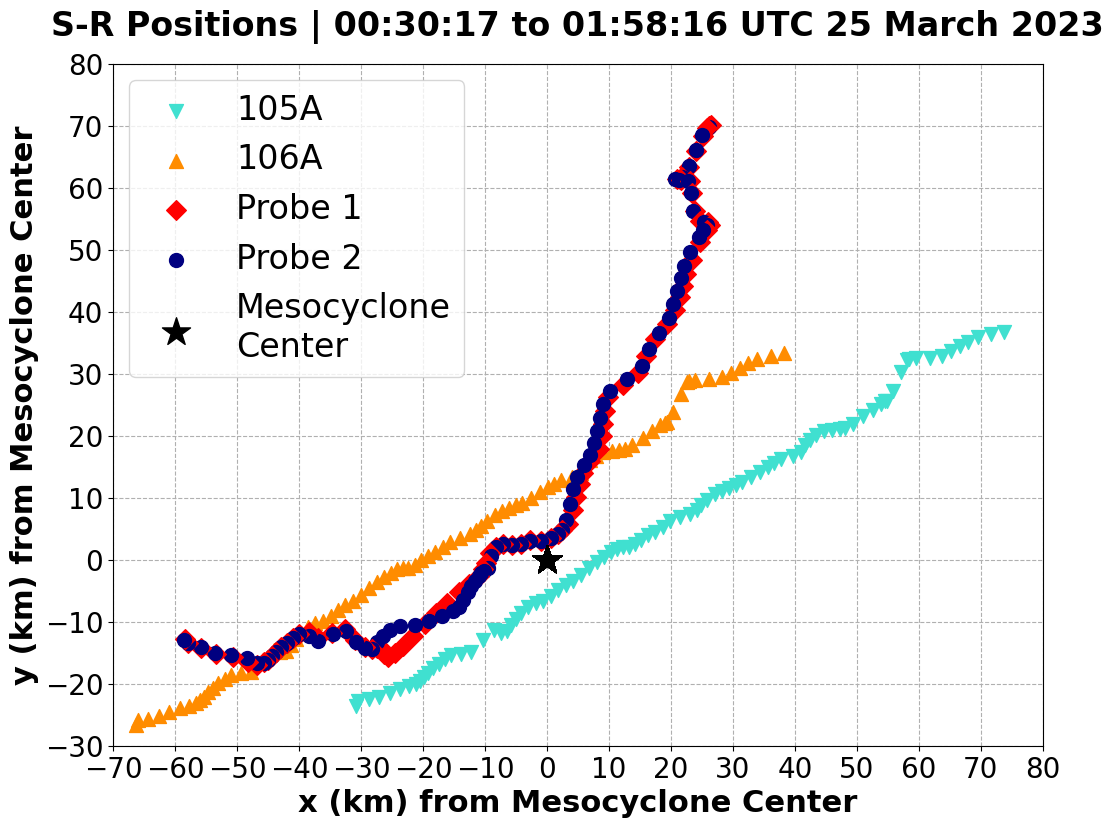

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.axis('square')

for t in range(0, len(p1), 60):

    plt.grid(True, linestyle = '--')
    plt.xticks(np.arange(-70, 81, 10), size = 20)
    plt.yticks(np.arange(-30, 81, 10), size = 20)

    plt.scatter(A105['x'][t], A105['y'][t], marker = 'v', color = 'turquoise', s = 100, zorder = 5)
    plt.scatter(A106['x'][t], A106['y'][t], marker = '^', color = 'darkorange', s = 100, zorder = 5)
    plt.scatter(p1['x'][t], p1['y'][t], marker = 'D', color = 'red', s = 100, zorder = 5)
    plt.scatter(p2['x'][t], p2['y'][t], color = 'navy', s = 100, zorder = 5)
    plt.scatter(0, 0, color = 'black', marker = '*', s = 450, zorder = 5)

    
    plt.legend(['105A', '106A', 'Probe 1', 'Probe 2', 'Mesocyclone' + '\n' + 'Center'], 
               loc = 'upper left', fontsize = 24)
    plt.title('S-R Positions | 00:30:17 to 01:58:16 UTC 25 March 2023', 
              size = 24, weight = 'bold', pad = 20)
    plt.xlabel('x (km) from Mesocyclone Center', size = 22, weight = 'bold')
    plt.ylabel('y (km) from Mesocyclone Center', size = 22, weight = 'bold')

In [10]:
## Figure 3 ##

Text(0, 0.5, 'y (km) from Mesocyclone Center')

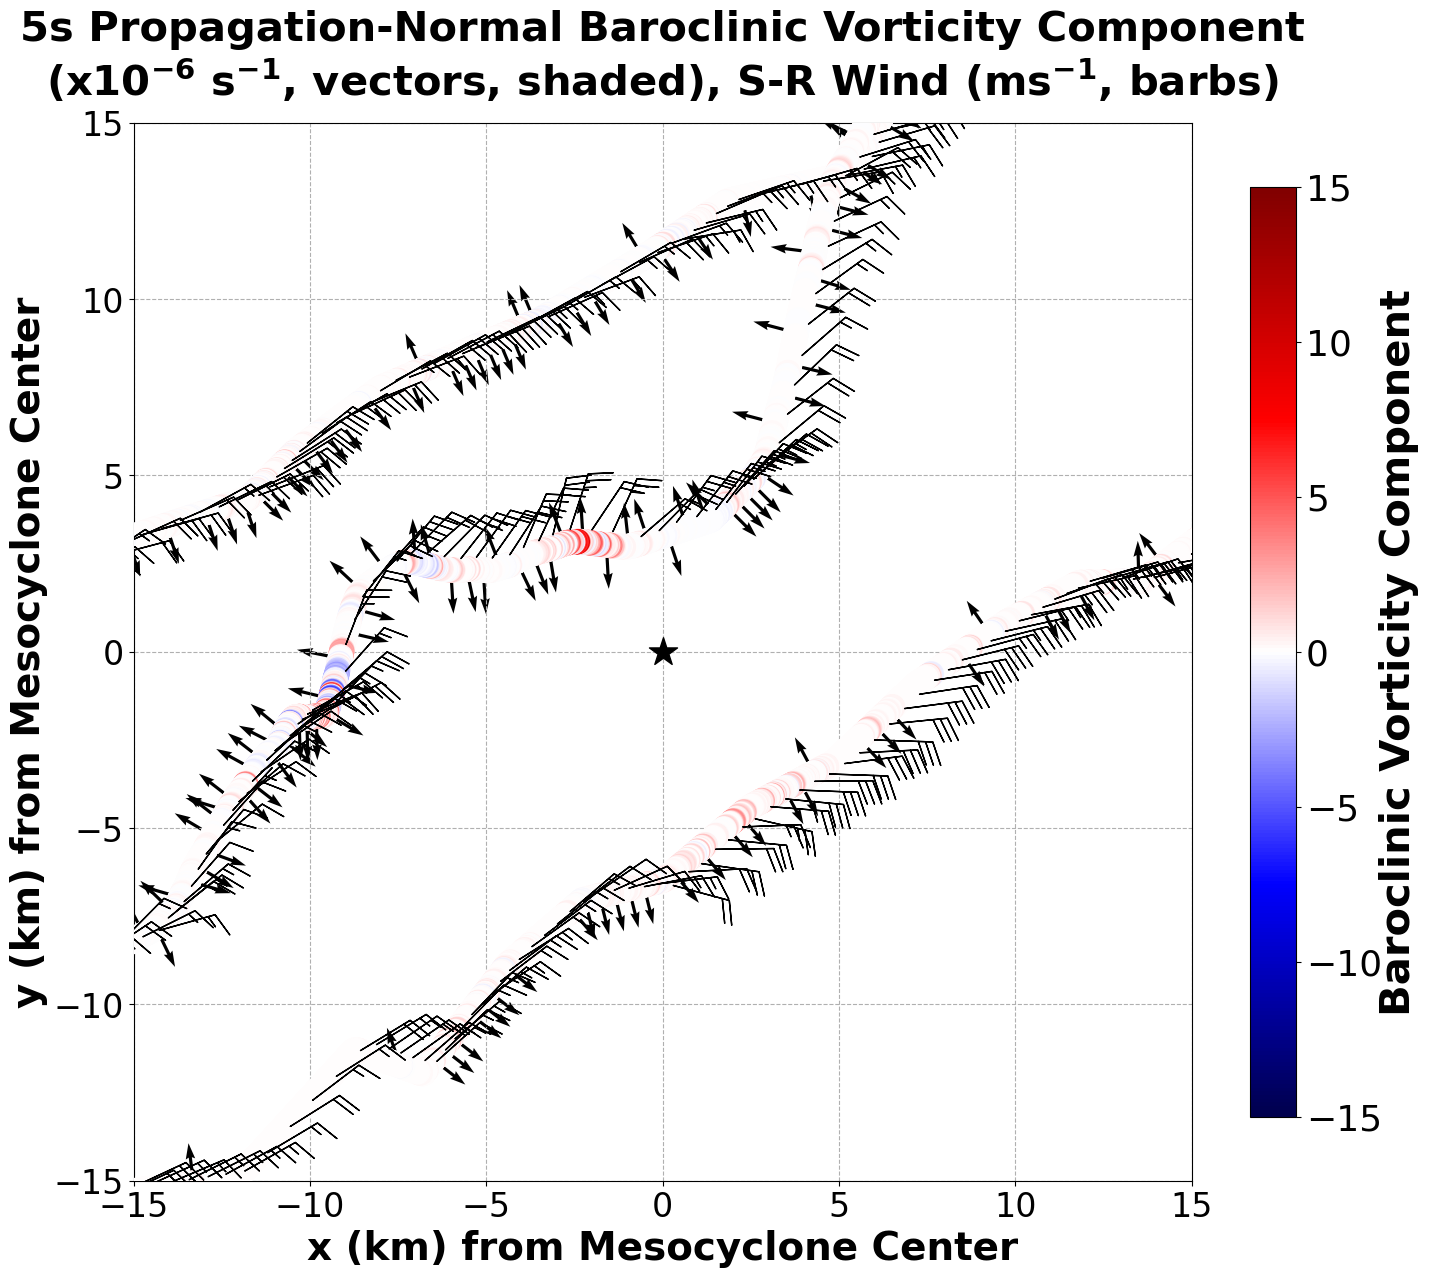

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_baro = (A105['Baroclinic Generated Vorticity'].apply(lambda x: x.magnitude).to_numpy())*(10**6)
A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_baro = (A106['Baroclinic Generated Vorticity'].apply(lambda x: x.magnitude).to_numpy())*(10**6)
A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_baro = (p2['Baroclinic Generated Vorticity'].apply(lambda x: x.magnitude).to_numpy())*(10**6)
p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)


scatterA105 = plt.scatter(A105['Gradient Mean x'], A105['Gradient Mean y'], c = A105_baro, cmap = 'seismic', 
            s = 300, vmin = -15, vmax = 15, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['Gradient Mean x'], A106['Gradient Mean y'], c = A106_baro, cmap = 'seismic', 
            s = 300, vmin = -15, vmax = 15, zorder = 5)

plt.scatter(p2['Gradient Mean x'], p2['Gradient Mean y'], c = p2_baro, cmap = 'seismic', 
            s = 300, vmin = -15, vmax = 15, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 450, zorder = 5)

sizes = {'width' : 0.3}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)

    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)

    x = A105['Gradient Mean x'][i]
    y = A105['Gradient Mean y'][i]
    baro_x = A105['BGV x_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
    baro_y = A105['BGV y_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
    baro_x_i = baro_x[i]
    baro_y_i = baro_y[i]
    
    plt.quiver(x, y, 
               baro_x_i/(np.abs(A105['Baroclinic Generated Vorticity'][i]*0.5)), 
               baro_y_i/(np.abs(A105['Baroclinic Generated Vorticity'][i]*0.5)), width = 0.003, 
               angles = 'xy', scale_units = 'xy', scale = 1.75)
    
    x = A106['Gradient Mean x'][i]
    y = A106['Gradient Mean y'][i]
    baro_x = A106['BGV x_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
    baro_x_i = baro_x[i]
    baro_y = A106['BGV y_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
    baro_y_i = baro_y[i]
    
    plt.quiver(x, y, 
               baro_x_i/(np.abs(A106['Baroclinic Generated Vorticity'][i]*0.5)), 
               baro_y_i/(np.abs(A106['Baroclinic Generated Vorticity'][i]*0.5)), width = 0.003, 
               angles = 'xy', scale_units = 'xy', scale = 1.75)
    
    x = p2['Gradient Mean x'][i]
    y = p2['Gradient Mean y'][i]
    baro_x = p2['BGV x_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
    baro_x_i = baro_x[i]
    baro_y = p2['BGV y_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
    baro_y_i = baro_y[i]
    plt.quiver(x, y, 
               baro_x_i/(np.abs(p2['Baroclinic Generated Vorticity'][i]*4)), 
               baro_y_i/(np.abs(p2['Baroclinic Generated Vorticity'][i]*4)), width = 0.003, 
               angles = 'xy', scale_units = 'xy', scale = .2)

cbar.set_label('Baroclinic Vorticity Component', size = 30, labelpad = -2, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)

plt.title('5s Propagation-Normal Baroclinic Vorticity Component\n'
          r'(x$\mathregular{10^{-6}}$ s$\mathregular{^{-1}}$, vectors, shaded), S-R Wind (ms$\mathregular{^{-1}}$, barbs)', 
          size=30, weight='bold', pad=20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

In [12]:
## Figure 4 ##

Text(0, 0.5, 'y (km) from Mesocyclone Center')

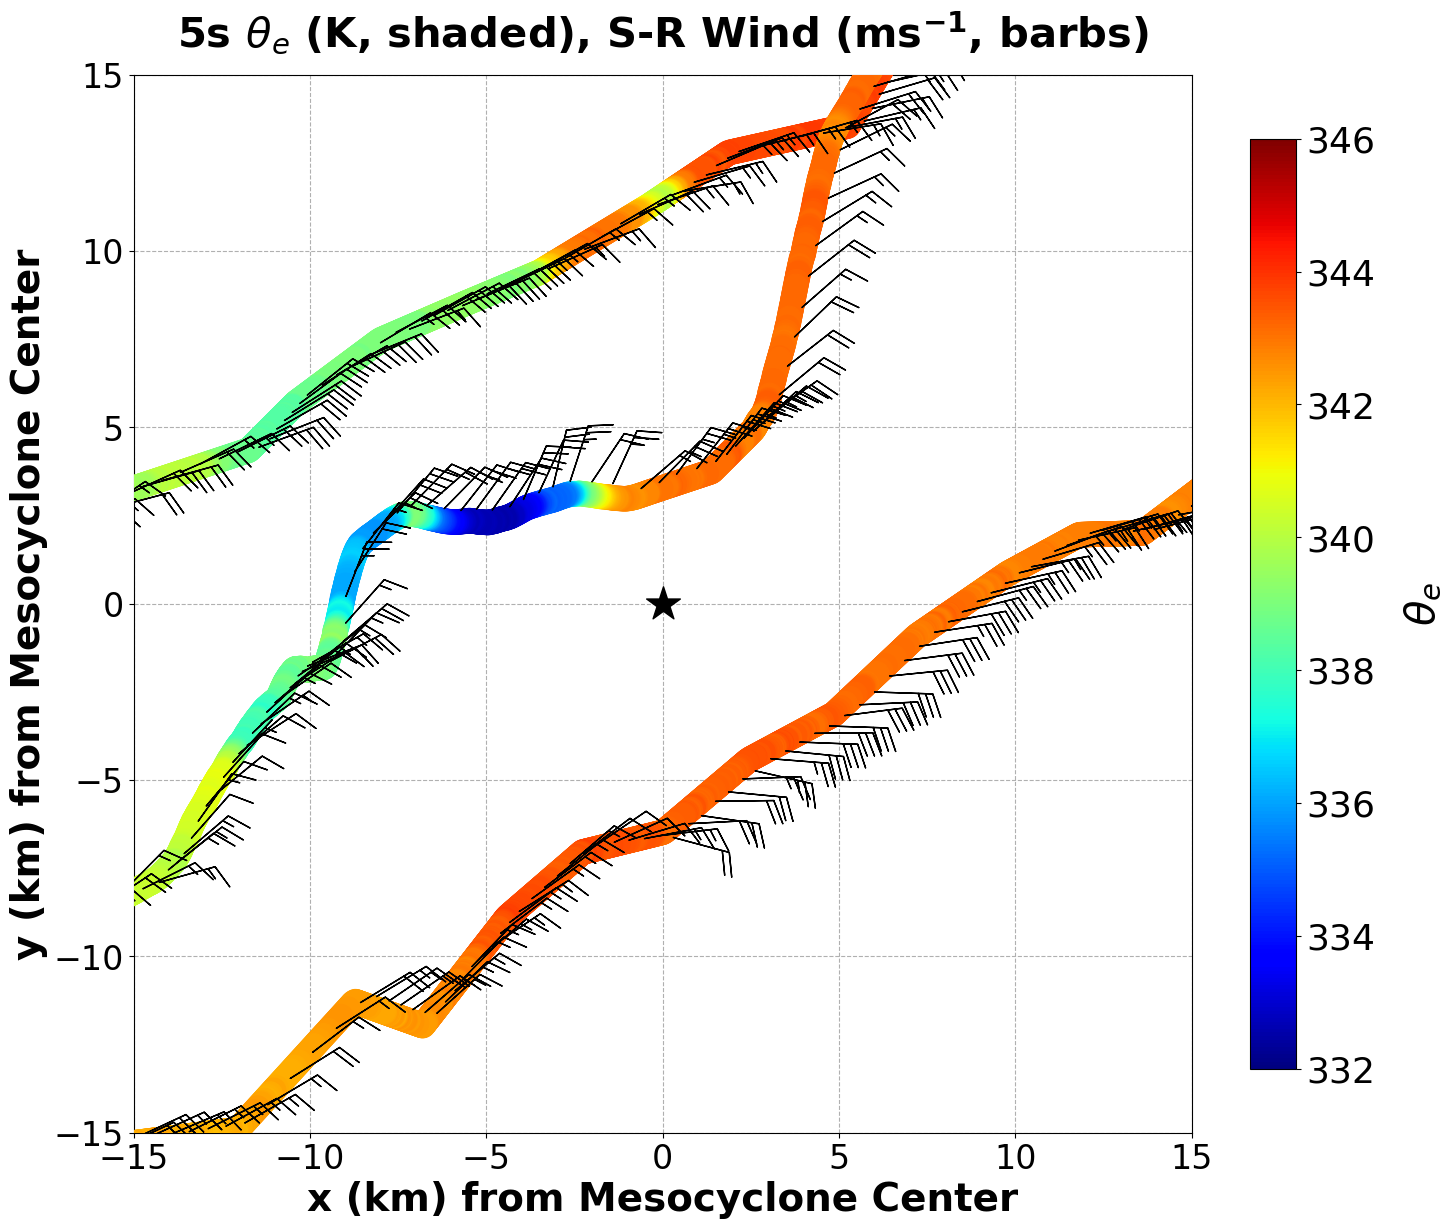

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_theta_e_magnitudes = A105['Theta_e'].apply(lambda x: x.magnitude).to_numpy()
A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_theta_e_magnitudes = A106['Theta_e'].apply(lambda x: x.magnitude).to_numpy()
A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_theta_e_magnitudes = p2['Theta_e'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_theta_e_magnitudes, cmap = 'jet', 
            s = 300, vmin = 332, vmax = 346, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_theta_e_magnitudes, cmap = 'jet', 
            s = 300, vmin = 332, vmax = 346, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_theta_e_magnitudes, cmap = 'jet', 
            s = 300, vmin = 332, vmax = 346, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.3}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label(r'$\theta$$_{e}$', size = 30, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
plt.title(r'5s $\theta$$_{e}$ (K, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)', 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

In [14]:
## Figure 5 ##

Text(0, 0.5, 'y (km) from Mesocyclone Center')

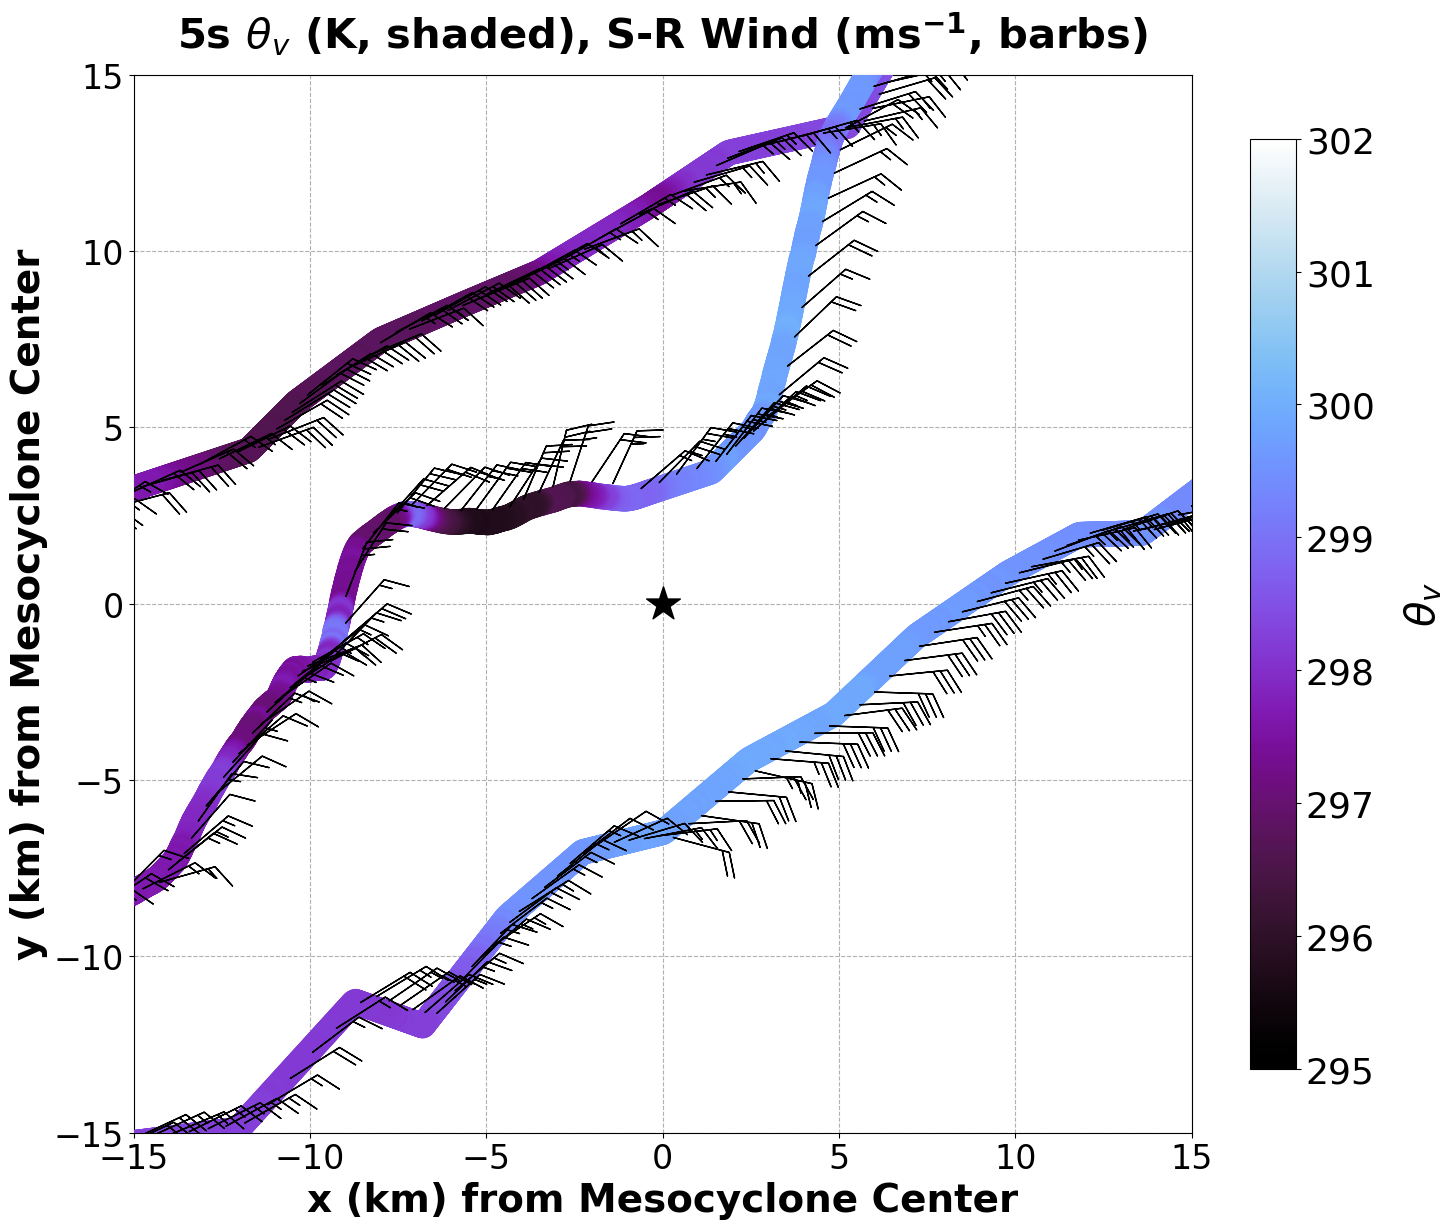

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_theta_v_magnitudes = A105['Theta_v'].apply(lambda x: x.magnitude).to_numpy()
A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_theta_v_magnitudes = A106['Theta_v'].apply(lambda x: x.magnitude).to_numpy()
A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_theta_v_magnitudes = p2['Theta_v'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_theta_v_magnitudes, cmap = cmasher.voltage, 
            s = 300, vmin = 295, vmax = 302, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_theta_v_magnitudes, cmap = cmasher.voltage, 
            s = 300, vmin = 295, vmax = 302, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_theta_v_magnitudes, cmap = cmasher.voltage, 
            s = 300, vmin = 295, vmax = 302, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.4}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label(r'$\theta$$_{v}$', size = 30, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
plt.title(r'5s $\theta$$_{v}$ (K, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)', 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

In [16]:
## Figure 6 ##

Text(0, 0.5, 'y (km) from Mesocyclone Center')

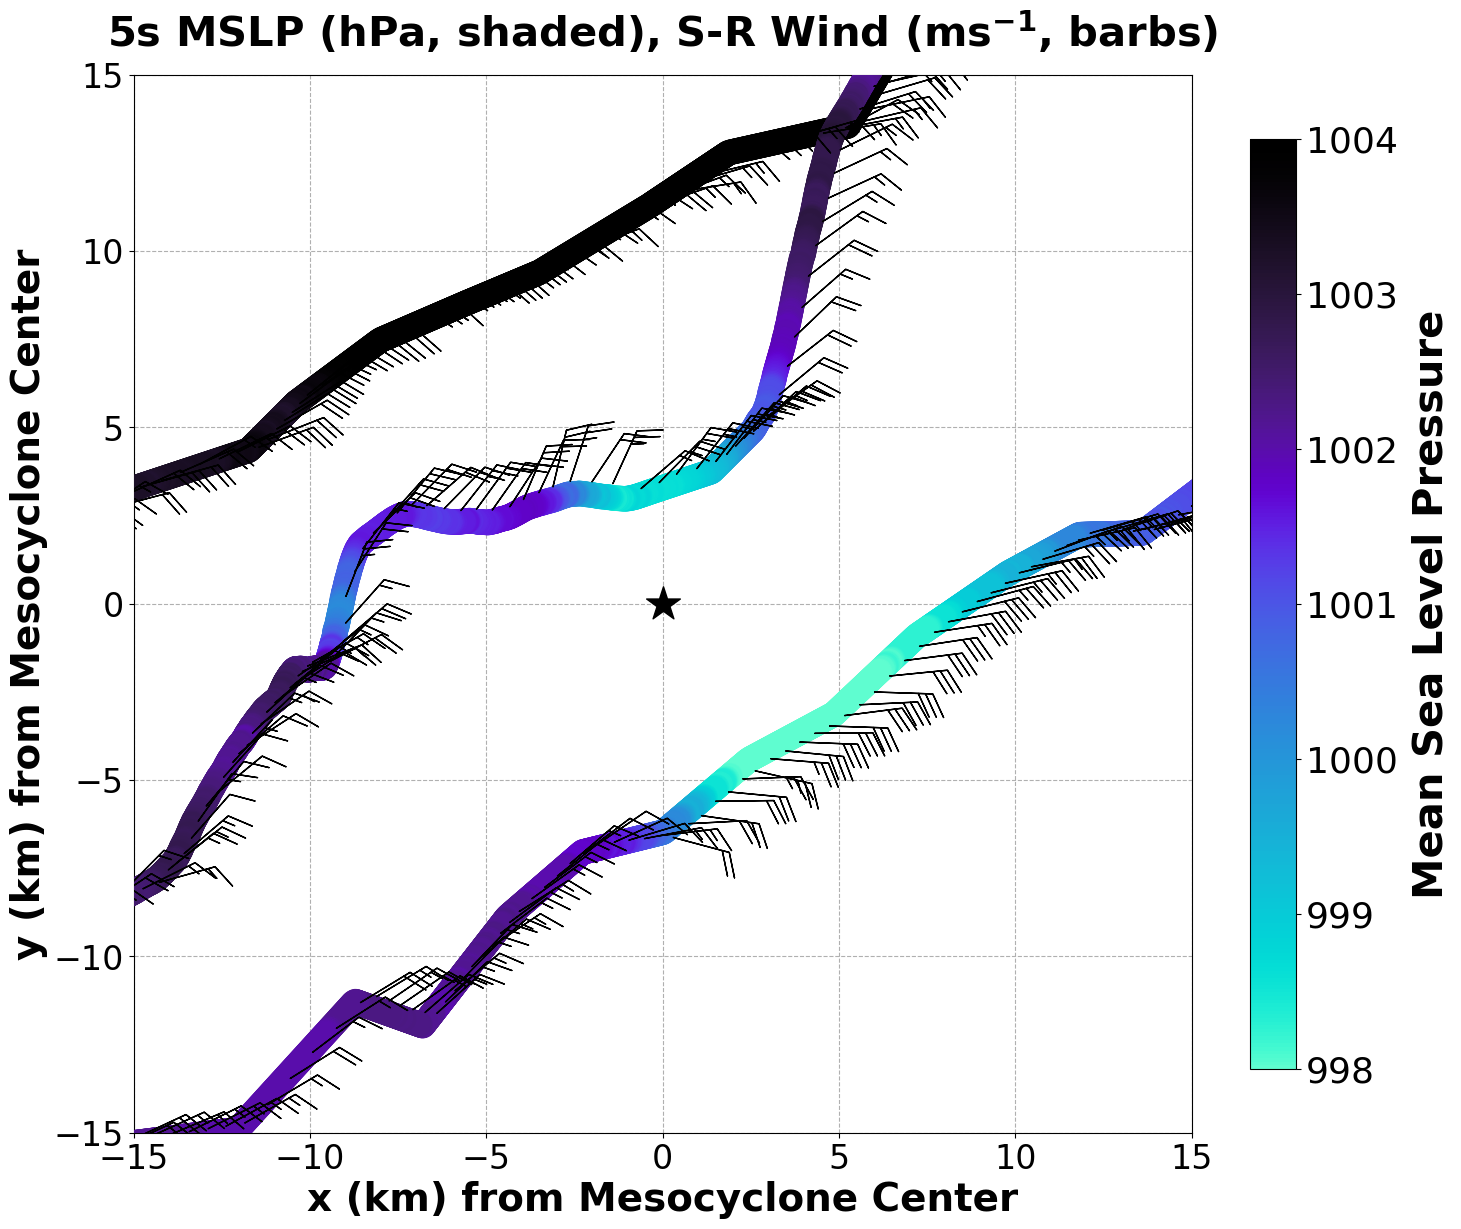

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_mslp_magnitudes = A105['MSLP'].apply(lambda x: x.magnitude).to_numpy()
A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_mslp_magnitudes = A106['MSLP'].apply(lambda x: x.magnitude).to_numpy()
A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_mslp_magnitudes = p2['MSLP'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_mslp_magnitudes, cmap = cmasher.cosmic_r, 
            s = 300, vmin = 998, vmax = 1004, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_mslp_magnitudes, cmap = cmasher.cosmic_r, 
            s = 300, vmin = 998, vmax = 1004, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_mslp_magnitudes, cmap = cmasher.cosmic_r, 
            s = 300, vmin = 998, vmax = 1004, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.4}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label('Mean Sea Level Pressure', size = 30, labelpad = 10, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
plt.title(r"5s MSLP (hPa, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)", 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

In [18]:
## Figure 7 ##

Text(0, 0.5, 'y (km) from Mesocyclone Center')

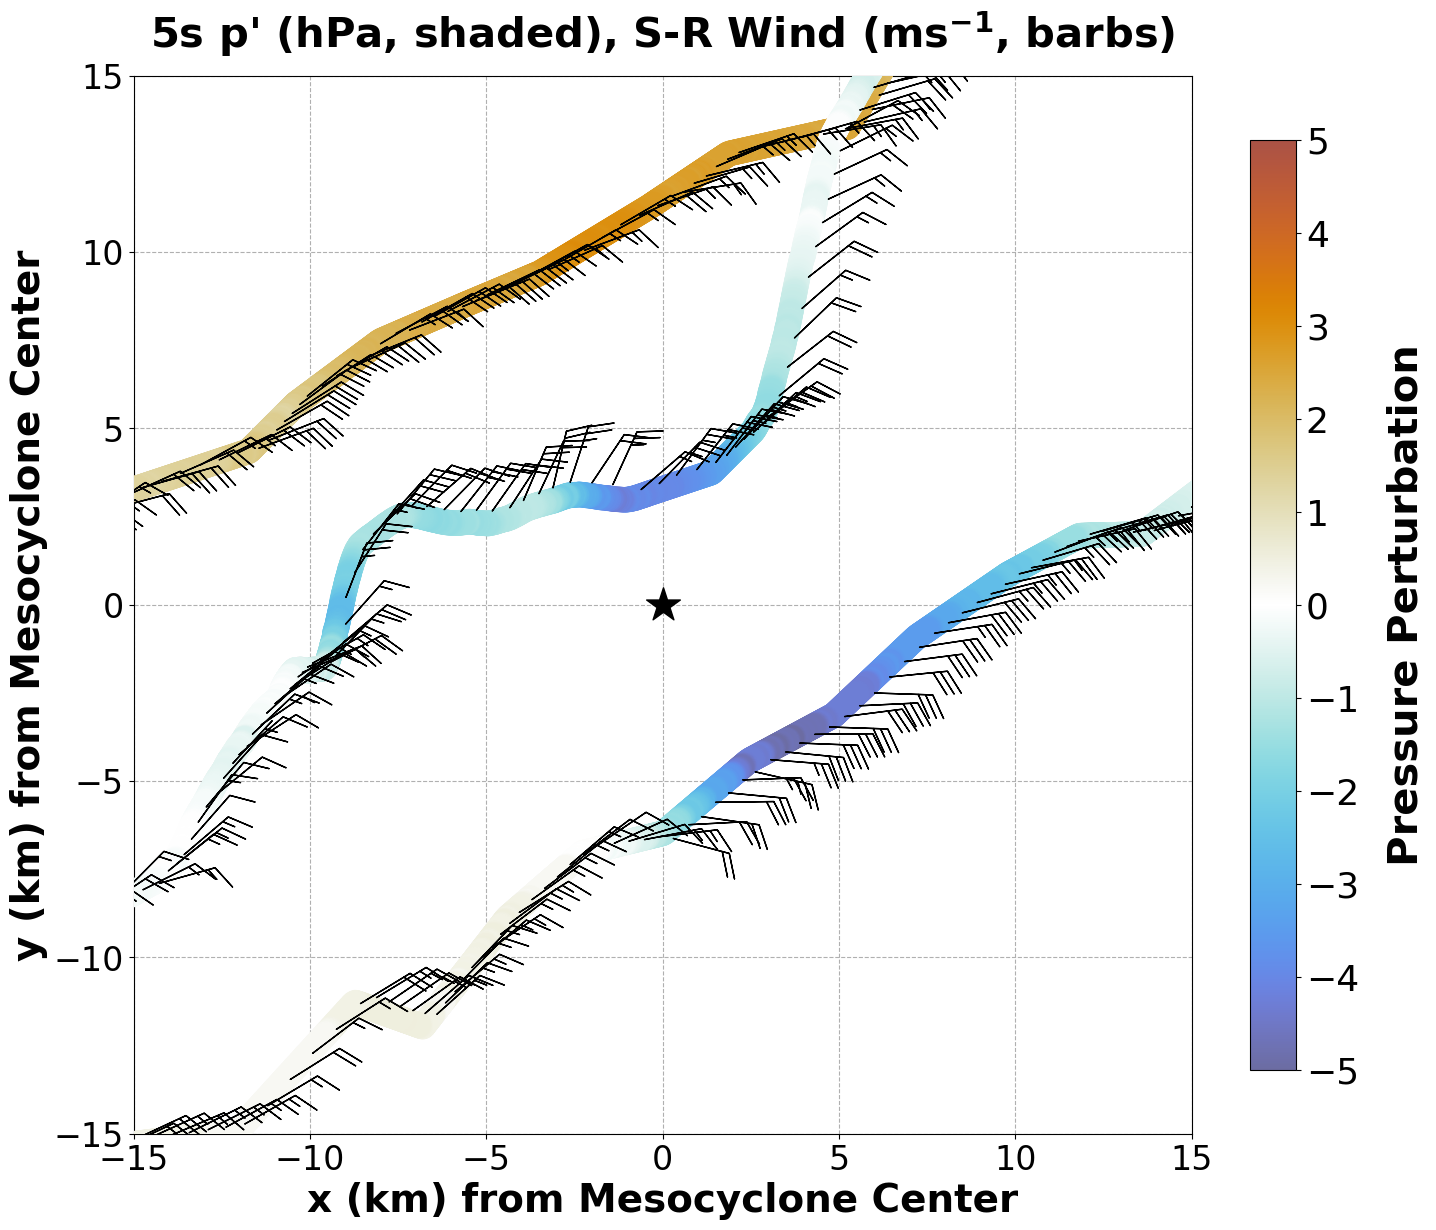

In [19]:
all_press = []
for i in range(0, len(A105), 1):
    all_press.append(A105['Pressure'][i])
for j in range(0, len(A106), 1):
    all_press.append(A106['Pressure'][j])
for k in range(0, len(p2), 1):
    all_press.append(p2['Pressure'][k])
mean_pressure = np.nanmean(all_press)

A105_p_pert = []
for i in range(0, len(A105['Pressure']), 1):
    pert = A105['Pressure'][i] - mean_pressure
    A105_p_pert.append(pert)

A106_p_pert = []
for j in range(0, len(A106['Pressure']), 1):
    pert = A106['Pressure'][j] - mean_pressure
    A106_p_pert.append(pert)

p2_p_pert = []
for k in range(0, len(p2['Pressure']), 1):
    pert = p2['Pressure'][k] - mean_pressure
    p2_p_pert.append(pert)
    
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_p_pert, cmap = cmasher.prinsenvlag_r, 
            s = 300, vmin = -5, vmax = 5, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_p_pert, cmap = cmasher.prinsenvlag_r, 
            s = 300, vmin = -5, vmax = 5, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_p_pert, cmap = cmasher.prinsenvlag_r, 
            s = 300, vmin = -5, vmax = 5, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.4}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
      
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label('Pressure Perturbation', size = 30, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
cbar.set_ticks(np.arange(-5, 6, 1))
plt.title(r"5s p' (hPa, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)", 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

In [20]:
## Figure 8 ##

Text(0, 0.5, 'y (km) from Mesocyclone Center')

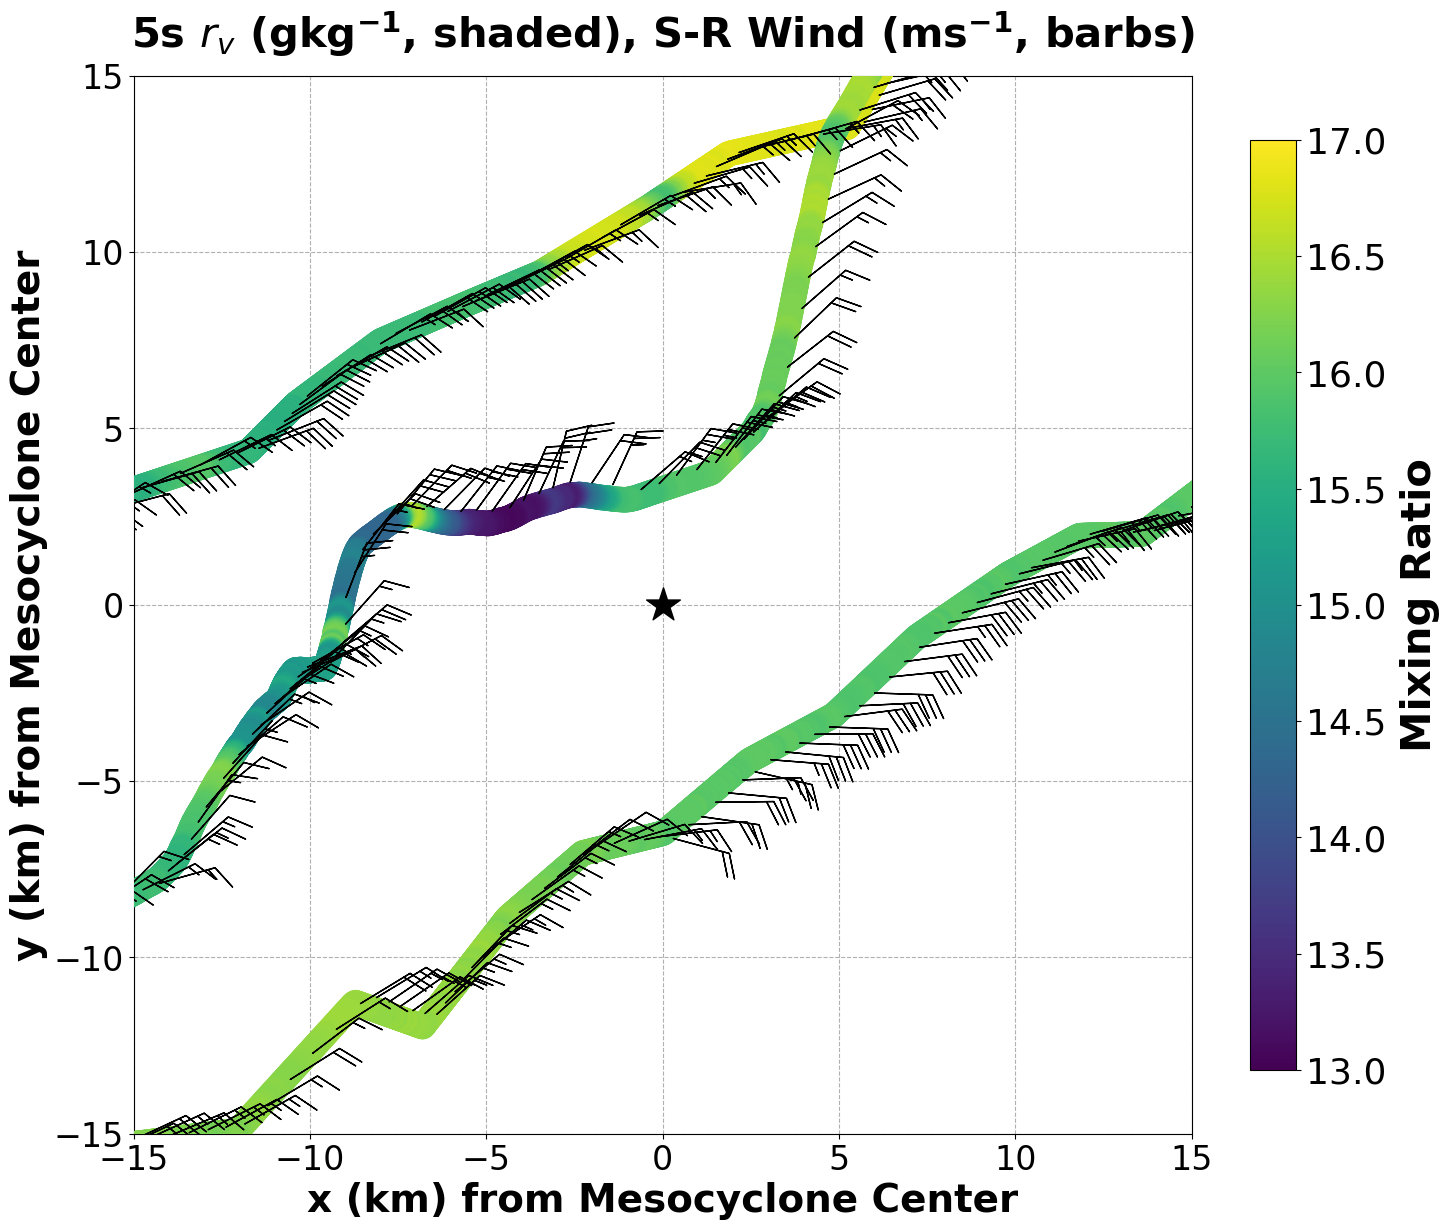

In [21]:
A105['Mixing Ratio'] = A105['Mixing Ratio'].apply(ureg.parse_expression)
A106['Mixing Ratio'] = A106['Mixing Ratio'].apply(ureg.parse_expression)
p2['Mixing Ratio'] = p2['Mixing Ratio'].apply(ureg.parse_expression)

fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_mix = p2['Mixing Ratio'].apply(lambda x: x.magnitude).to_numpy()*1000
A105_mix = A105['Mixing Ratio'].apply(lambda x: x.magnitude).to_numpy()*1000
A106_mix = A106['Mixing Ratio'].apply(lambda x: x.magnitude).to_numpy()*1000

p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_mix, cmap = 'viridis', 
            s = 300, vmin = 13, vmax = 17, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_mix, cmap = 'viridis', 
            s = 300, vmin = 13, vmax = 17, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_mix, cmap = 'viridis', 
            s = 300, vmin = 13, vmax = 17, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.4}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label('Mixing Ratio', size = 30, labelpad = 10, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
plt.title(r"5s $r_{v}$ (g$\mathregular{kg^{-1}}$, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)", 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

In [22]:
## Figure 9 ##

Text(-2.375, 2.65, 'LFCB')

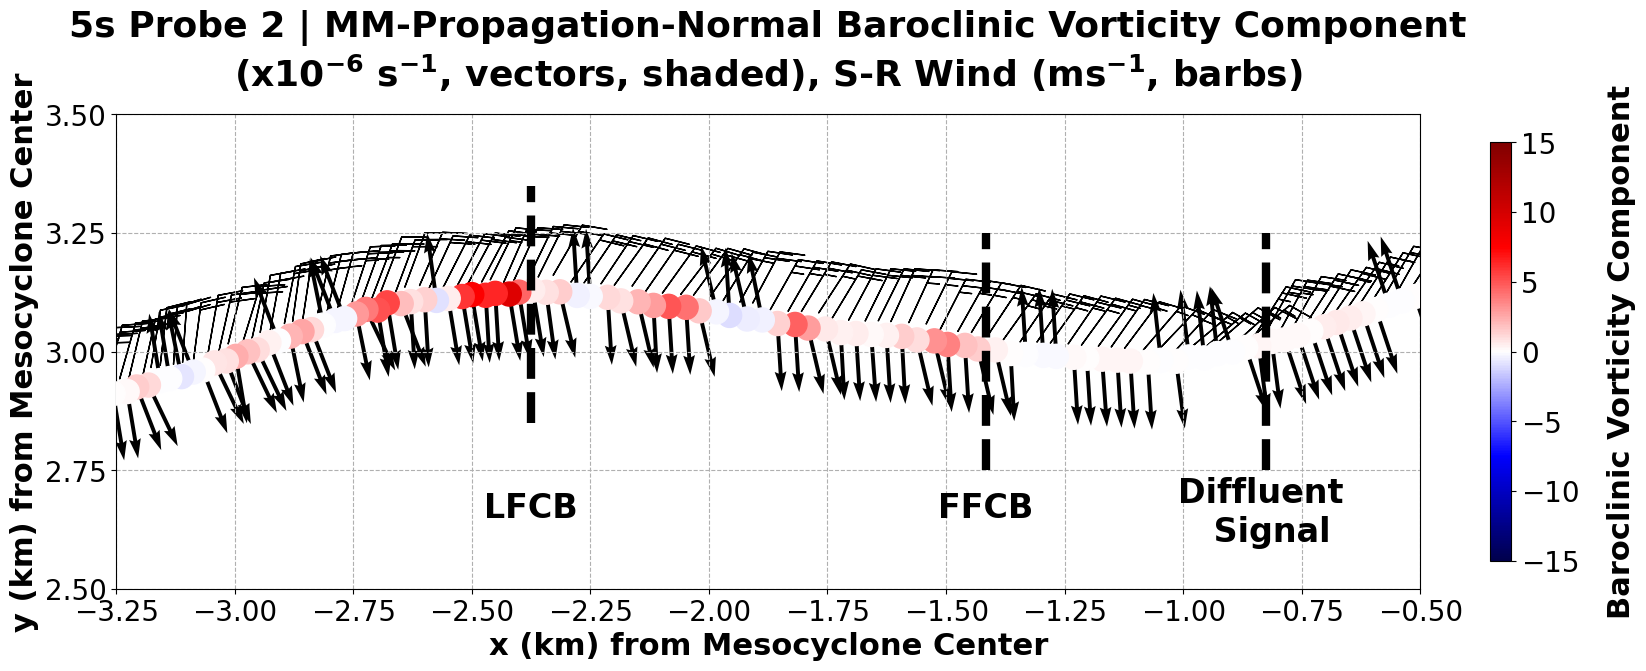

In [23]:
x_coords = p2['Gradient Mean x']
y_coords = p2['Gradient Mean y']
baro_x = p2['BGV x_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
baro_y = p2['BGV y_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)

baro = (p2['Baroclinic Generated Vorticity'].apply(lambda x: x.magnitude).to_numpy())*(10**6)

u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

fig, ax = plt.subplots(figsize=(18, 8))
plt.axis('square')

plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-3.25, -0.4, 0.25), size = 20)
plt.xlim([-3.25, -0.5])
plt.ylim([2.5, 3.5])
plt.yticks(np.arange(2.5, 3.6, 0.25), size = 20)
plt.scatter(0, 0, c = 'black', marker = '*', s = 450)
scatter = plt.scatter(x_coords, y_coords, c = baro, s = 300, 
                      cmap = 'seismic', vmin = -15, vmax = 15, zorder = 5)

cbar = plt.colorbar(scatter, fraction=0.015)

sizes = {'width' : 0.3}
cbar.ax.tick_params(labelsize=20)

for i in range(0, len(p2), 1):
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(u_magnitudes[i], v_magnitudes[i], sizes = sizes)
    x = x_coords[i]
    y = y_coords[i]
    baro_x_i = baro_x[i]
    baro_y_i = baro_y[i]
    plt.quiver(x, y, 
               baro_x_i / np.abs(p2['Baroclinic Generated Vorticity'][i]*4), 
               baro_y_i / np.abs(p2['Baroclinic Generated Vorticity'][i]*4), 
               width=0.003, angles='xy', scale_units='xy', scale=1.75)

cbar.set_label('Baroclinic Vorticity Component', size = 22, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 22, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 22, weight = 'bold')
plt.title(r'5s Probe 2 | MM-Propagation-Normal Baroclinic Vorticity Component' + '\n'
          + r'(x$\mathregular{10^{-6}}$ $\mathregular{s^{-1}}}$, vectors, shaded), '
          + r'S-R Wind (m$\mathregular{s^{-1}}$, barbs)'
          , size = 26, weight = 'bold', pad = 20)
plt.axvline(x = -0.825, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('Diffluent \n Signal', xy = (-0.825, 2.65), xytext = (-0.825, 2.6), size = 24,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -1.4166666666666667, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('FFCB', xy = (-1.4166666666666667, 2.65), xytext = (-1.4166666666666667, 2.65), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -2.375, ymin = 0.35, ymax = 0.85, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('LFCB', xy = (-2.375, 2.65), xytext = (-2.375, 2.65), size = 24,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

In [24]:
## Figure 10 ##

Text(-2.375, 2.65, 'LFCB')

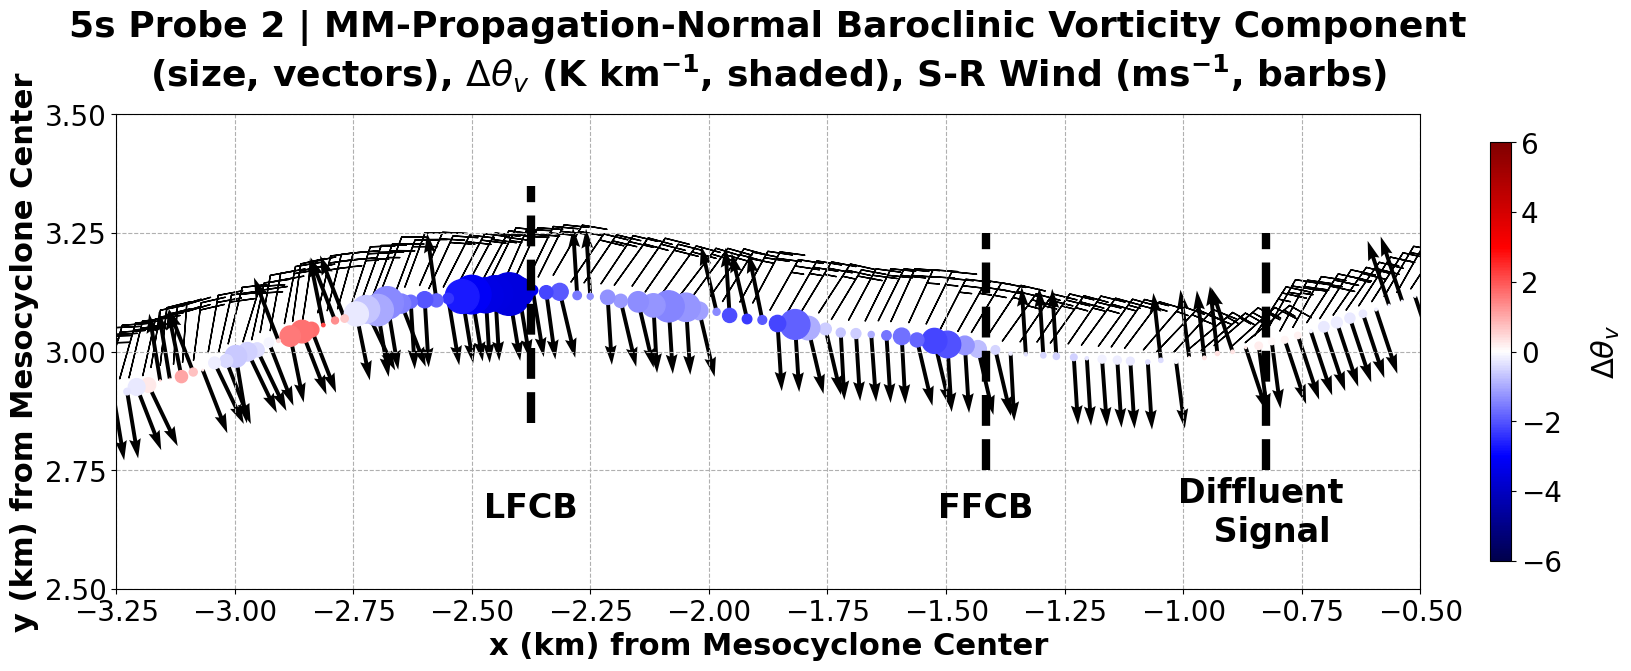

In [25]:
x_coords = p2['Gradient Mean x']
y_coords = p2['Gradient Mean y']
baro_x = p2['BGV x_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
baro_y = p2['BGV y_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)

baro = (p2['Baroclinic Generated Vorticity'].apply(lambda x: x.magnitude).to_numpy())*(10**6)
delta_theta_v = p2['Delta Theta_v'].apply(lambda x: x.magnitude).to_numpy()
u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

fig, ax = plt.subplots(figsize=(18, 8))
plt.axis('square')

plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-3.25, -0.4, 0.25), size = 20)
plt.xlim([-3.25, -0.5])
plt.ylim([2.5, 3.5])
plt.yticks(np.arange(2.5, 3.6, 0.25), size = 20)

scatter = plt.scatter(x_coords, y_coords, c = delta_theta_v, s = np.abs(baro)*100, 
                      cmap = 'seismic', vmin = -6, vmax = 6, zorder = 5)

cbar = plt.colorbar(scatter, fraction=0.015)

sizes = {'width' : 0.3}
cbar.ax.tick_params(labelsize=20)

for i in range(0, len(p2), 1):
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(u_magnitudes[i], v_magnitudes[i], sizes = sizes)
    x = x_coords[i]
    y = y_coords[i]
    baro_x_i = baro_x[i]
    baro_y_i = baro_y[i]
    plt.quiver(x, y, 
               baro_x_i/np.abs(p2['Baroclinic Generated Vorticity'][i]*4), 
               baro_y_i/np.abs(p2['Baroclinic Generated Vorticity'][i]*4), width = 0.003, 
               angles = 'xy', scale_units = 'xy', scale = 1.75)

cbar.set_label(r'$\Delta$$\theta$$_{v}$', size = 22, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 22, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 22, weight = 'bold')
plt.title(r'5s Probe 2 | MM-Propagation-Normal Baroclinic Vorticity Component' + '\n'
          + r'(size, vectors), $\Delta$$\theta_{v}$ (K $\mathregular{km^{-1}}$, shaded), '
          + r'S-R Wind (m$\mathregular{s^{-1}}$, barbs)'
          , size = 26, weight = 'bold', pad = 20)

plt.axvline(x = -0.825, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('Diffluent \n Signal', xy = (-0.825, 2.65), xytext = (-0.825, 2.6), size = 24,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -1.4166666666666667, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('FFCB', xy = (-1.4166666666666667, 2.65), xytext = (-1.4166666666666667, 2.65), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -2.375, ymin = 0.35, ymax = 0.85, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('LFCB', xy = (-2.375, 2.65), xytext = (-2.375, 2.65), size = 24,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

In [26]:
## Figure 11 ##

Text(-2.375, 2.65, 'LFCB')

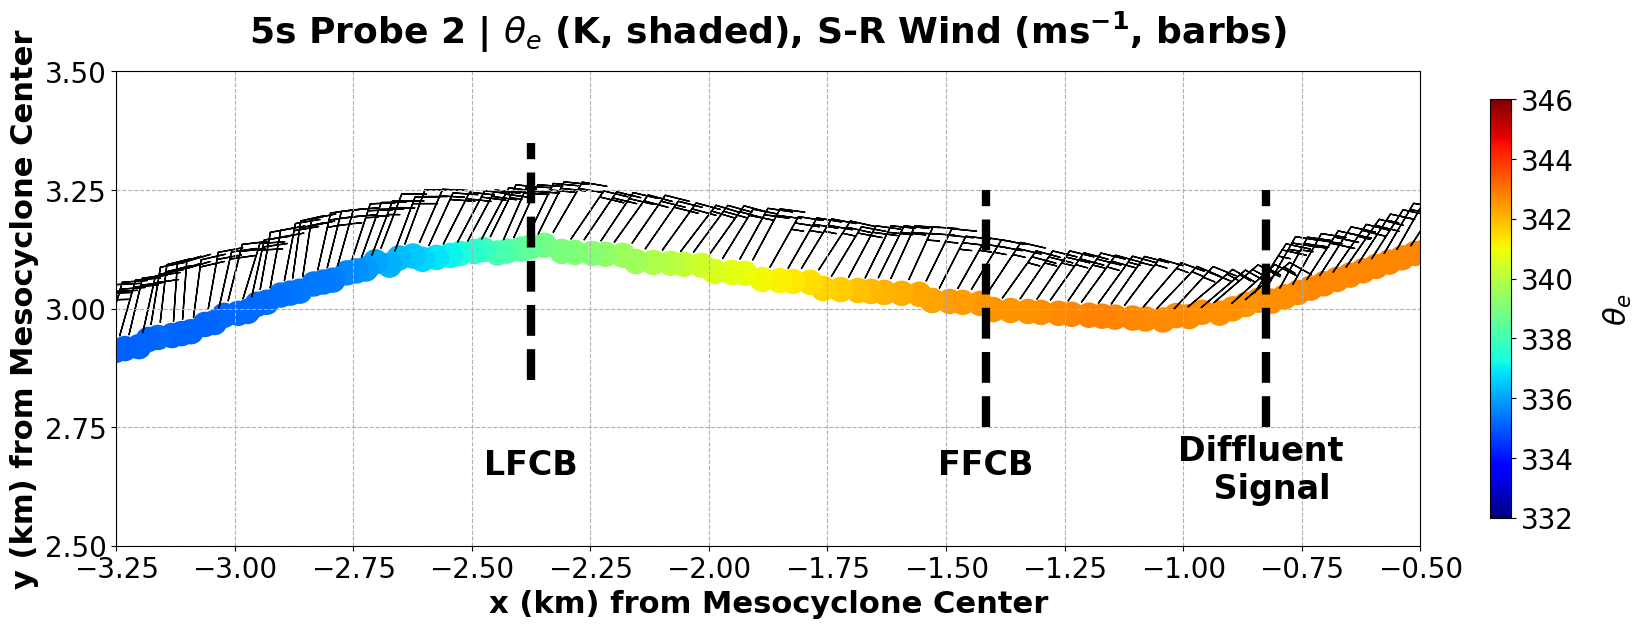

In [27]:
u_comp = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
v_comp = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()
x_coords = p2['x']
y_coords = p2['y']
baro_x = p2['BGV x_comp']
baro_y = p2['BGV y_comp']

theta_e = (p2['Theta_e'].apply(lambda x: x.magnitude).to_numpy())

fig, ax = plt.subplots(figsize=(18, 8))
plt.axis('square')

plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-3.25, -0.4, 0.25), size = 20)
plt.xlim([-3.25, -0.5])
plt.ylim([2.5, 3.5])
plt.yticks(np.arange(2.5, 3.6, 0.25), size = 20)

scatter = plt.scatter(x_coords, y_coords, c = theta_e, s = 300, 
                      cmap = 'jet', vmin = 332, vmax = 346)

cbar = plt.colorbar(scatter, fraction=0.015)

sizes = {'width' : 0.3}
cbar.ax.tick_params(labelsize=20)

for i in range(0, len(p2), 1):
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(u_comp[i], v_comp[i], sizes = sizes)
    x = x_coords[i]
    y = y_coords[i]

cbar.set_label(r'$\theta_{e}$', size = 22, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 22, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 22, weight = 'bold')
plt.title(r'5s Probe 2 | $\theta_{e}$ (K, shaded), '
          + r'S-R Wind (m$\mathregular{s^{-1}}$, barbs)'
          , size = 26, weight = 'bold', pad = 20)
plt.axvline(x = -0.825, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('Diffluent \n Signal', xy = (-0.825, 2.65), xytext = (-0.825, 2.6), size = 24,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -1.4166666666666667, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('FFCB', xy = (-1.4166666666666667, 2.65), xytext = (-1.4166666666666667, 2.65), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -2.375, ymin = 0.35, ymax = 0.85, linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 10)
plt.annotate('LFCB', xy = (-2.375, 2.65), xytext = (-2.375, 2.65), size = 24,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

In [28]:
## Figure 12 ##

Text(2, -9, 'RFGF')

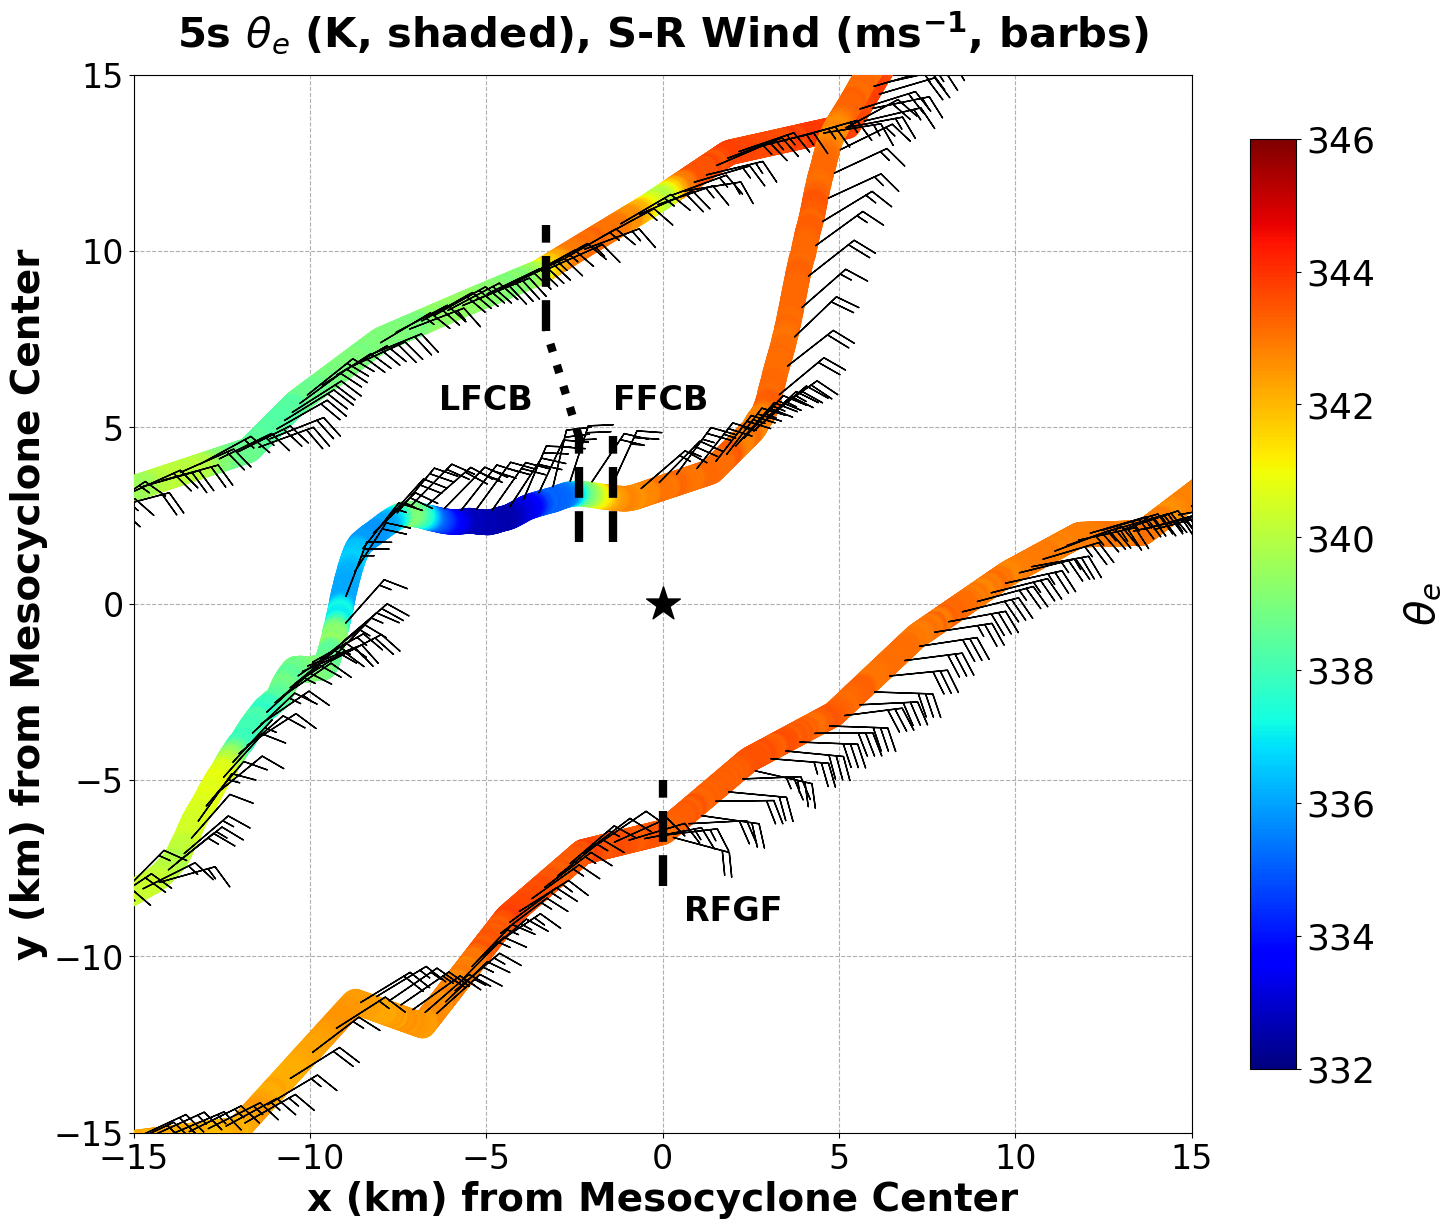

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_theta_e_magnitudes = A105['Theta_e'].apply(lambda x: x.magnitude).to_numpy()
A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_theta_e_magnitudes = A106['Theta_e'].apply(lambda x: x.magnitude).to_numpy()
A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_theta_e_magnitudes = p2['Theta_e'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_theta_e_magnitudes, cmap = 'jet', 
            s = 300, vmin = 332, vmax = 346, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_theta_e_magnitudes, cmap = 'jet', 
            s = 300, vmin = 332, vmax = 346, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_theta_e_magnitudes, cmap = 'jet', 
            s = 300, vmin = 332, vmax = 346, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.3}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label(r'$\theta$$_{e}$', size = 30, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
plt.title(r'5s $\theta$$_{e}$ (K, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)', 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

plt.plot([-2.375, -2.375], [1.75, 4.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-1.4166666666666667, -1.4166666666666667], [1.75, 4.75], 
         linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([0, 0], [-8, -5], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-3.3, -3.3], [7.75, 10.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-2.375, -3.3], [4.75, 7.75], linestyle = 'dotted', linewidth = 6, color = 'black', zorder = 7)

plt.annotate('FFCB', xy = (-1.4166666666666667, 5.5), xytext = (-1.4166666666666667, 5.5), size = 24,
            horizontalalignment = 'left', color = 'black', weight = 'bold')
plt.annotate('LFCB', xy = (-5, 5.5), xytext = (-5, 5.5), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')
plt.annotate('RFGF', xy = (2, -9), xytext = (2, -9), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')

In [30]:
## Figure 13 ##

Text(2, -9, 'RFGF')

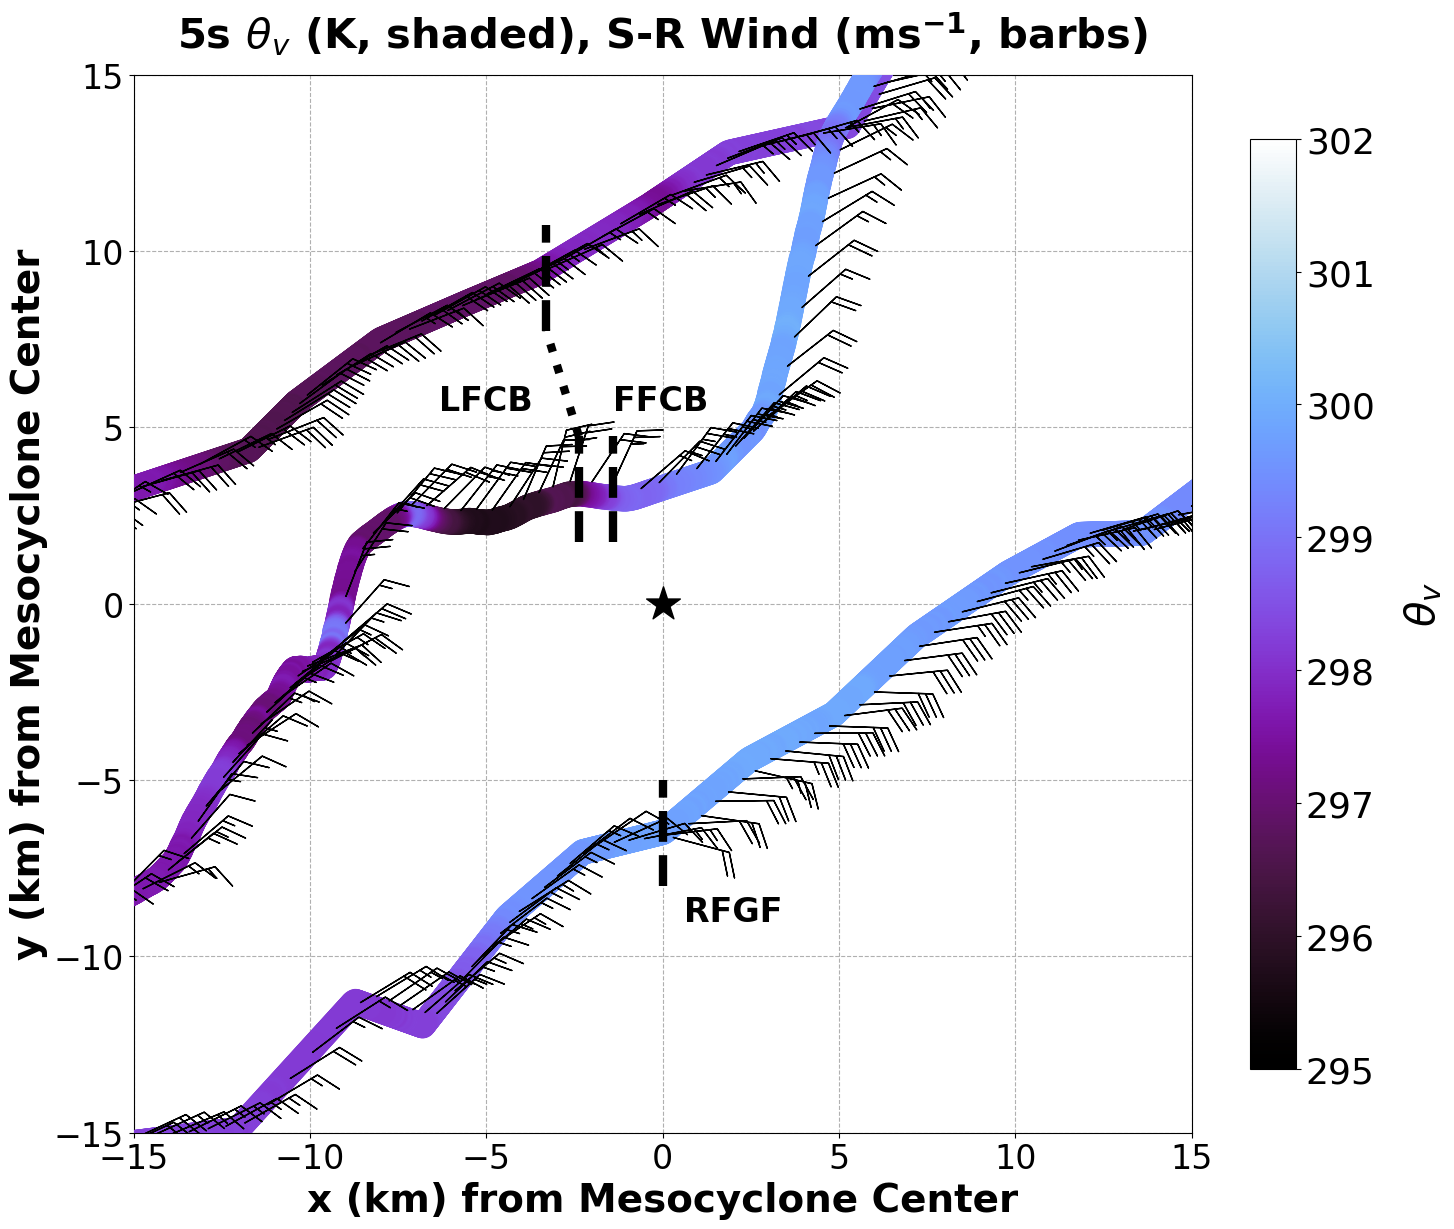

In [31]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_theta_v_magnitudes = A105['Theta_v'].apply(lambda x: x.magnitude).to_numpy()
A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_theta_v_magnitudes = A106['Theta_v'].apply(lambda x: x.magnitude).to_numpy()
A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_theta_v_magnitudes = p2['Theta_v'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_theta_v_magnitudes, cmap = cmasher.voltage, 
            s = 300, vmin = 295, vmax = 302, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_theta_v_magnitudes, cmap = cmasher.voltage, 
            s = 300, vmin = 295, vmax = 302, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_theta_v_magnitudes, cmap = cmasher.voltage, 
            s = 300, vmin = 295, vmax = 302, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.4}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label(r'$\theta$$_{v}$', size = 30, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
plt.title(r'5s $\theta$$_{v}$ (K, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)', 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

plt.plot([-2.375, -2.375], [1.75, 4.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-1.4166666666666667, -1.4166666666666667], [1.75, 4.75], 
         linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([0, 0], [-8, -5], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-3.3, -3.3], [7.75, 10.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-2.375, -3.3], [4.75, 7.75], linestyle = 'dotted', linewidth = 6, color = 'black', zorder = 7)

plt.annotate('FFCB', xy = (-1.4166666666666667, 5.5), xytext = (-1.4166666666666667, 5.5), size = 24,
            horizontalalignment = 'left', color = 'black', weight = 'bold')
plt.annotate('LFCB', xy = (-5, 5.5), xytext = (-5, 5.5), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')
plt.annotate('RFGF', xy = (2, -9), xytext = (2, -9), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')

In [32]:
## Figure 14 ##

Text(2, -9, 'RFGF')

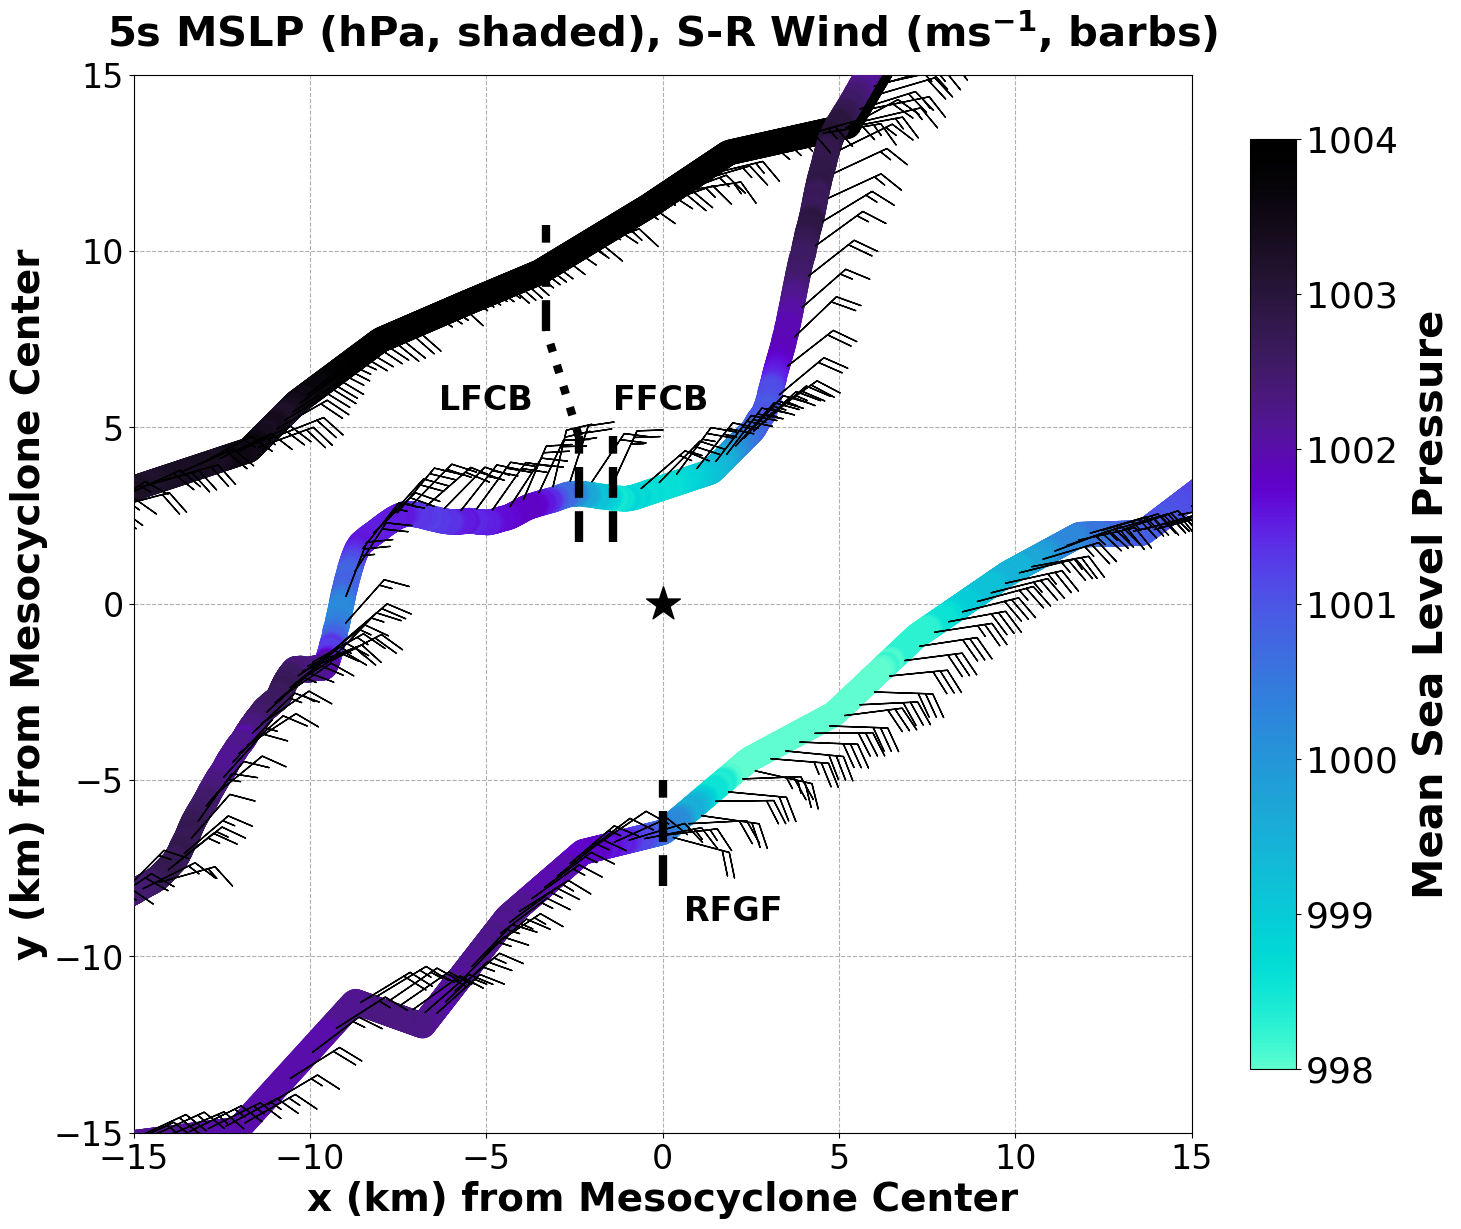

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_mslp_magnitudes = A105['MSLP'].apply(lambda x: x.magnitude).to_numpy()
A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_mslp_magnitudes = A106['MSLP'].apply(lambda x: x.magnitude).to_numpy()
A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_mslp_magnitudes = p2['MSLP'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_mslp_magnitudes, cmap = cmasher.cosmic_r, 
            s = 300, vmin = 998, vmax = 1004, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_mslp_magnitudes, cmap = cmasher.cosmic_r, 
            s = 300, vmin = 998, vmax = 1004, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_mslp_magnitudes, cmap = cmasher.cosmic_r, 
            s = 300, vmin = 998, vmax = 1004, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.4}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label('Mean Sea Level Pressure', size = 30, labelpad = 10, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
plt.title(r"5s MSLP (hPa, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)", 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

plt.plot([-2.375, -2.375], [1.75, 4.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-1.4166666666666667, -1.4166666666666667], [1.75, 4.75], 
         linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([0, 0], [-8, -5], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-3.3, -3.3], [7.75, 10.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-2.375, -3.3], [4.75, 7.75], linestyle = 'dotted', linewidth = 6, color = 'black', zorder = 7)

plt.annotate('FFCB', xy = (-1.4166666666666667, 5.5), xytext = (-1.4166666666666667, 5.5), size = 24,
            horizontalalignment = 'left', color = 'black', weight = 'bold')
plt.annotate('LFCB', xy = (-5, 5.5), xytext = (-5, 5.5), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')
plt.annotate('RFGF', xy = (2, -9), xytext = (2, -9), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')

In [34]:
## Figure 15 ##

Text(2, -9, 'RFGF')

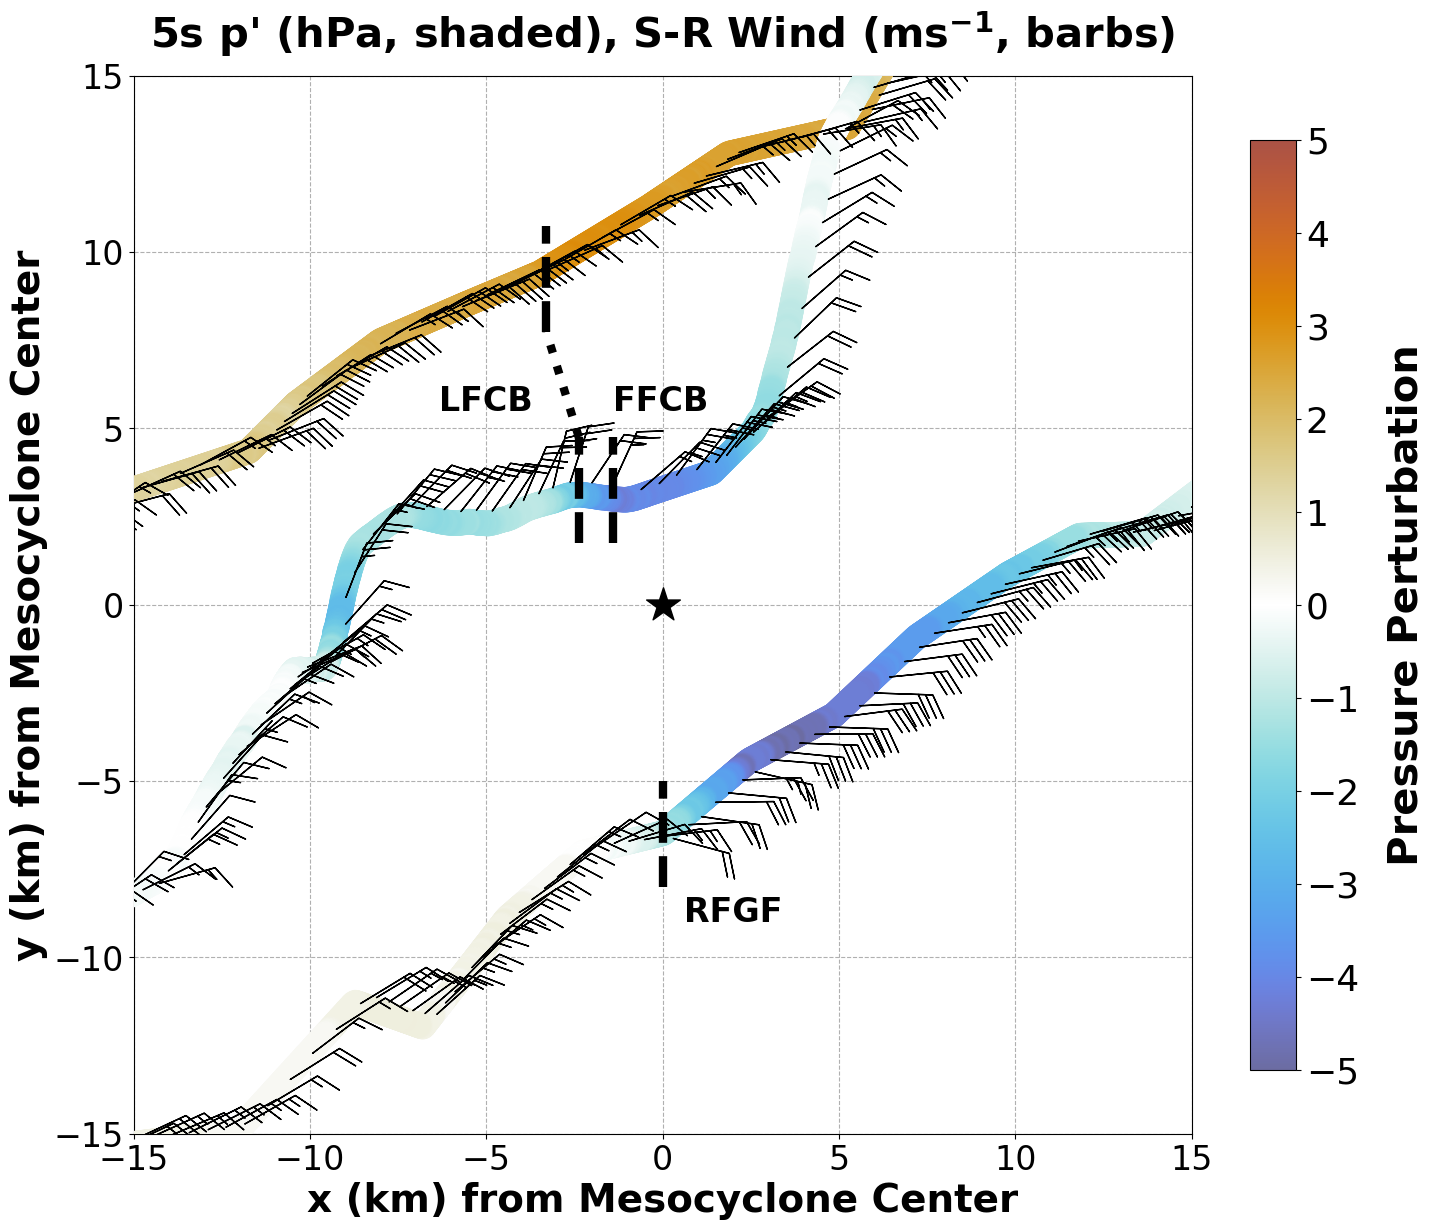

In [35]:
all_press = []
for i in range(0, len(A105), 1):
    all_press.append(A105['Pressure'][i])
for j in range(0, len(A106), 1):
    all_press.append(A106['Pressure'][j])
for k in range(0, len(p2), 1):
    all_press.append(p2['Pressure'][k])
mean_pressure = np.nanmean(all_press)

A105_p_pert = []
for i in range(0, len(A105['Pressure']), 1):
    pert = A105['Pressure'][i] - mean_pressure
    A105_p_pert.append(pert)

A106_p_pert = []
for j in range(0, len(A106['Pressure']), 1):
    pert = A106['Pressure'][j] - mean_pressure
    A106_p_pert.append(pert)

p2_p_pert = []
for k in range(0, len(p2['Pressure']), 1):
    pert = p2['Pressure'][k] - mean_pressure
    p2_p_pert.append(pert)
    
fig, ax = plt.subplots(figsize=(15, 15))
plt.axis('square')

A105_u_magnitudes = A105['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A105_v_magnitudes = A105['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

A106_u_magnitudes = A106['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
A106_v_magnitudes = A106['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()

p2_u_magnitudes = p2['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p2['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()


plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-15, 16, 5), size = 24)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.yticks(np.arange(-15, 16, 5), size = 24)

scatterA105 = plt.scatter(A105['x'], A105['y'], c = A105_p_pert, cmap = cmasher.prinsenvlag_r, 
            s = 300, vmin = -5, vmax = 5, zorder = 5)
cbar = plt.colorbar(scatterA105, fraction=0.04)

plt.scatter(A106['x'], A106['y'], c = A106_p_pert, cmap = cmasher.prinsenvlag_r, 
            s = 300, vmin = -5, vmax = 5, zorder = 5)

plt.scatter(p2['x'], p2['y'], c = p2_p_pert, cmap = cmasher.prinsenvlag_r, 
            s = 300, vmin = -5, vmax = 5, zorder = 5)

plt.scatter(0, 0, color = 'black', marker = '*', s = 650, zorder = 5)

sizes = {'width' : 0.4}
for i in range(0, len(p2), 20):
    stationplot = StationPlot(ax, A105['x'][i], A105['y'][i], fontsize = 22)
    stationplot.plot_barb(A105_u_magnitudes[i], A105_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, A106['x'][i], A106['y'][i], fontsize = 22)
    stationplot.plot_barb(A106_u_magnitudes[i], A106_v_magnitudes[i], sizes = sizes, zorder = 6)
    
    stationplot = StationPlot(ax, p2['x'][i], p2['y'][i], fontsize = 22)
    stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, zorder = 6)


cbar.set_label('Pressure Perturbation', size = 30, labelpad = 20, weight = 'bold')
cbar.ax.tick_params(labelsize = 26)
cbar.set_ticks(np.arange(-5, 6, 1))
plt.title(r"5s p' (hPa, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)", 
          size = 30, weight = 'bold', pad = 20)

plt.xlabel('x (km) from Mesocyclone Center', size = 28, weight = 'bold')
plt.ylabel('y (km) from Mesocyclone Center', size = 28, weight = 'bold')

plt.plot([-2.375, -2.375], [1.75, 4.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-1.4166666666666667, -1.4166666666666667], [1.75, 4.75], 
         linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([0, 0], [-8, -5], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-3.3, -3.3], [7.75, 10.75], linestyle = 'dashed', linewidth = 6, color = 'black', zorder = 7)
plt.plot([-2.375, -3.3], [4.75, 7.75], linestyle = 'dotted', linewidth = 6, color = 'black', zorder = 7)

plt.annotate('FFCB', xy = (-1.4166666666666667, 5.5), xytext = (-1.4166666666666667, 5.5), size = 24,
            horizontalalignment = 'left', color = 'black', weight = 'bold')
plt.annotate('LFCB', xy = (-5, 5.5), xytext = (-5, 5.5), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')
plt.annotate('RFGF', xy = (2, -9), xytext = (2, -9), size = 24,
            horizontalalignment = 'center', color = 'black', weight = 'bold')

In [36]:
## Figure 16 ##

In [37]:
import pyart
from metpy.plots import StationPlot
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
from pint import UnitRegistry
import cmocean as cmo
import cmasher
import cartopy.crs as ccrs
import os
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import LinearSegmentedColormap

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import MultipleLocator
from matplotlib.font_manager import FontProperties

path = '/Users/josia/Desktop/Python/NSSL Internship/'


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [38]:
p25s = pd.read_csv(path + 'Data/P2/5s_AVG_P2_Variables.csv')
p25s['a_wrt_COW'] = ((np.sin((p25s['P2 Lat Rad'] - np.deg2rad(33.31668472)) / 2))**2 
             + np.cos(np.deg2rad(33.31668472))*np.cos(p25s['P2 Lat Rad'])*(np.sin((p25s['P2 Lon Rad'] 
                                        - (np.deg2rad(-91.49195862)))/2))**2)
p25s['c_wrt_COW'] = 2*np.arctan2(np.sqrt(p25s['a_wrt_COW']), np.sqrt((1 - p25s['a_wrt_COW'])))
p25s['Distance_wrt_COW'] = p25s['c_wrt_COW']*6371 # unit for Radius of Earth is m

y = np.sin(p25s['P2 Lon Rad'] - (np.deg2rad(-91.49195862)))*np.cos(p25s['P2 Lat Rad'])
x = ((np.cos(np.deg2rad(33.31668472))*np.sin(p25s['P2 Lat Rad'])) 
     - (np.sin(np.deg2rad(33.31668472))*np.cos(p25s['P2 Lat Rad'])*np.cos(p25s['P2 Lon Rad'] 
                                            - np.deg2rad(-91.49195862))))

p25s['Bearing_wrt_COW'] = np.arctan2(y, x)
p25s['x_wrt_COW'] =p25s['Distance_wrt_COW']*np.sin((p25s['Bearing_wrt_COW']))
p25s['y_wrt_COW'] = p25s['Distance_wrt_COW']*np.cos((p25s['Bearing_wrt_COW']))

p25s['a_meso_wrt_COW'] = ((np.sin((p25s['Meso Lat Rad'] - np.deg2rad(33.31668472)) / 2))**2 
             + np.cos(np.deg2rad(33.31668472))*np.cos(p25s['Meso Lat Rad'])*(np.sin((p25s['Meso Lon Rad'] 
                                        - (np.deg2rad(-91.49195862)))/2))**2)
p25s['c_meso_wrt_COW'] = 2*np.arctan2(np.sqrt(p25s['a_meso_wrt_COW']), np.sqrt((1 - p25s['a_meso_wrt_COW'])))
p25s['Distance_meso_wrt_COW'] = p25s['c_meso_wrt_COW']*6371 # unit for Radius of Earth is m

y = np.sin(p25s['Meso Lon Rad'] - (np.deg2rad(-91.49195862)))*np.cos(p25s['Meso Lat Rad'])
x = ((np.cos(np.deg2rad(33.31668472))*np.sin(p25s['Meso Lat Rad'])) 
     - (np.sin(np.deg2rad(33.31668472))*np.cos(p25s['Meso Lat Rad'])*np.cos(p25s['Meso Lon Rad'] 
                                            - np.deg2rad(-91.49195862))))

p25s['Bearing_meso_wrt_COW'] = np.arctan2(y, x)
p25s['x_meso_wrt_COW'] = p25s['Distance_meso_wrt_COW']*np.sin((p25s['Bearing_meso_wrt_COW']))
p25s['y_meso_wrt_COW'] = p25s['Distance_meso_wrt_COW']*np.cos((p25s['Bearing_meso_wrt_COW']))

In [39]:
p25s['Theta_v'] = p25s['Theta_v'].apply(ureg.parse_expression)
p25s['Theta_e'] = p25s['Theta_e'].apply(ureg.parse_expression)
p25s['storm_rel_u'] = p25s['storm_rel_u'].apply(ureg.parse_expression)
p25s['storm_rel_v'] = p25s['storm_rel_v'].apply(ureg.parse_expression)
p25s['Baroclinic Generated Vorticity'] = p25s['Baroclinic Generated Vorticity'].apply(ureg.parse_expression)
p25s['BGV x_comp'] = p25s['BGV x_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
p25s['BGV y_comp'] = p25s['BGV y_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)

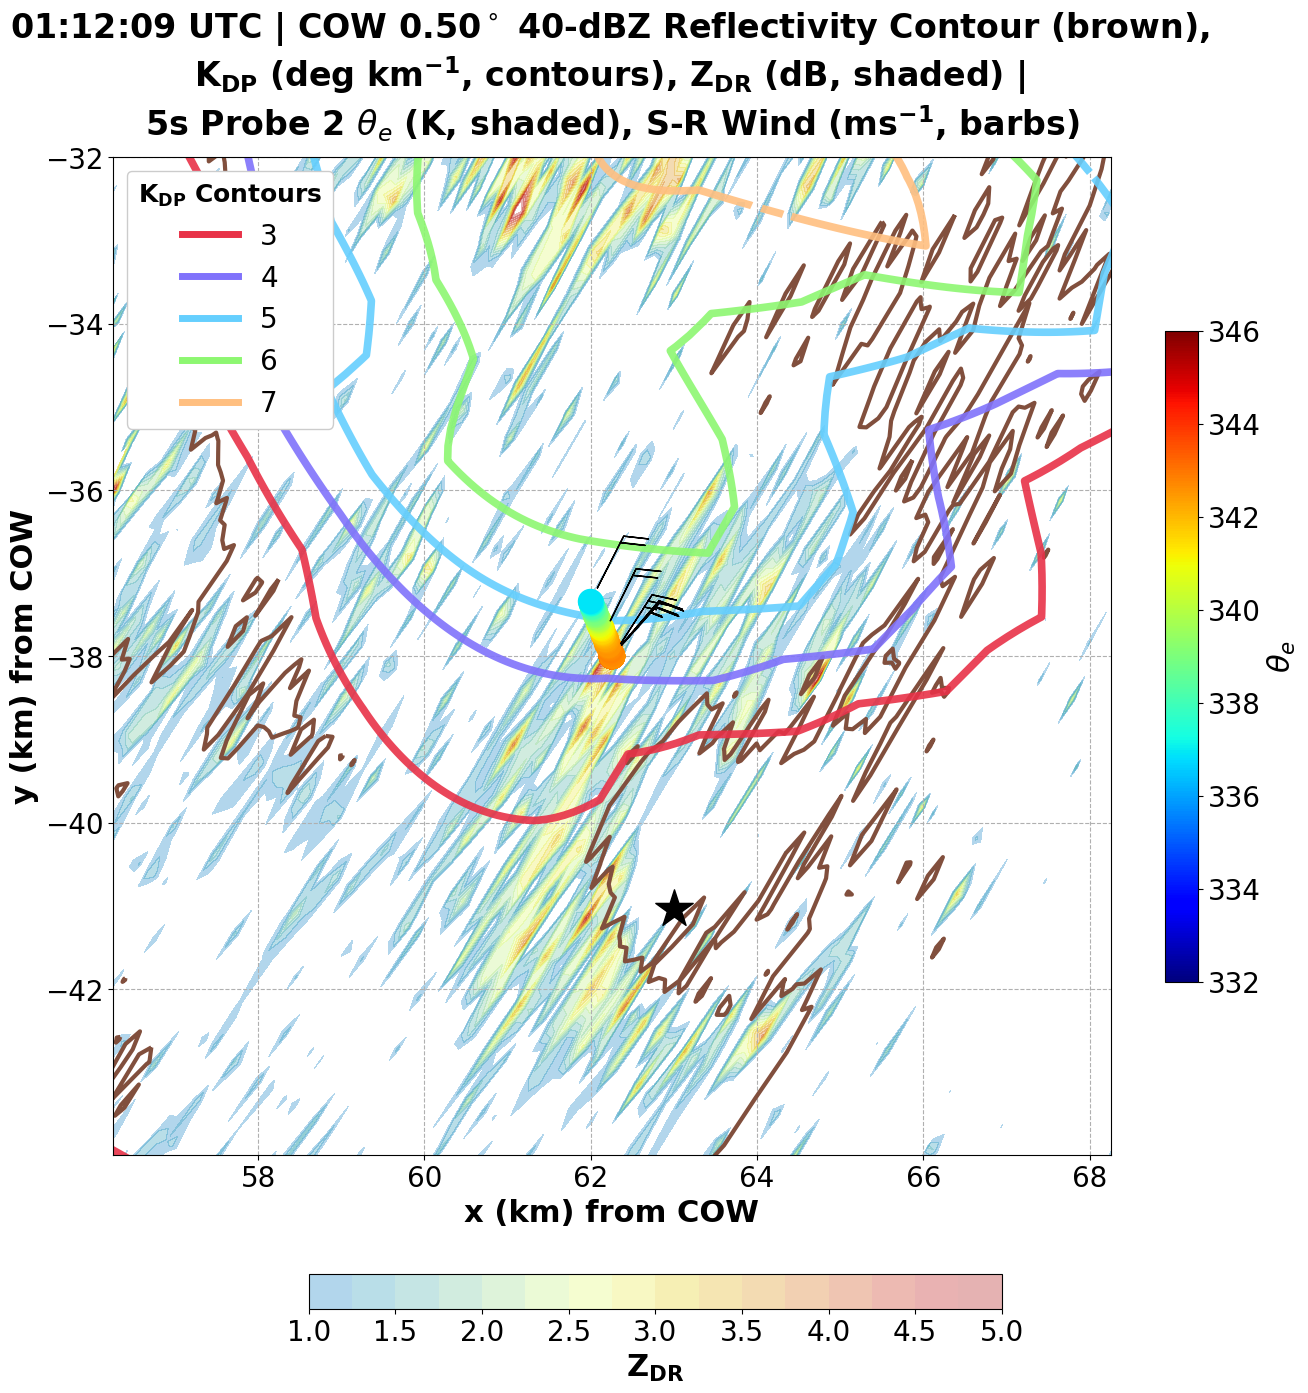

In [40]:
p2_theta_e_magnitudes = p25s['Theta_e'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p25s['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p25s['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()
p2_x_coords = p25s['Longitude']
p2_y_coords = p25s['Latitude']    
directory_path = path + 'Data/COW/'
file_names = os.listdir(directory_path)

file = 'cfrad.20230325_011209.342_COW1_v21_s01_el0.50_SUR.nc'
ztime = file[15:17] + ':' + file[17:19] + ':' + file[19:21]
decimal_time = round((3600*int(file[15:17]) + 60*int(file[17:19]) + int(file[19:21])) / 3600, 7)
idx, =np.where(p25s['Decimal Time'] == decimal_time)
time = idx[0]
dt = 60
elevation_angle = file[41:45]

plat = p2_y_coords[time]
plon = p2_x_coords[time]

if (np.isnan(plat)) or (np.isnan(plon)):
    test = 0

else:

    fig = plt.figure(figsize=[14, 15], layout='constrained')
    plt.tight_layout()

    radar = pyart.io.read(directory_path + file)
    radar.add_field_like("RHOHV","cross_correlation_ratio",radar.fields["RHOHV"]["data"].copy())
    kdp_vulpiani = pyart.retrieve.kdp_vulpiani(radar, windsize = 40, psidp_field = 'PHIDP', 
                   band='C', prefilter_psidp = "cross_correlation_ratio")
    radar.add_field('kdp_vulpiani', kdp_vulpiani[0])

    reflectivity = radar.fields['DBZHCC']['data']
    zdr = radar.fields['ZDRC']['data']
    kdp = radar.fields['kdp_vulpiani']['data']

    range_data = radar.range['data']
    azimuths = radar.azimuth['data']

    r, theta = np.meshgrid(range_data, np.radians(azimuths))
    x = r * np.sin(theta) / 1000
    y = r * np.cos(theta) / 1000

    contours_ref = plt.contour(x, y, reflectivity, levels=[40], 
                               colors = ['#814F3D'], alpha = 1, linewidths = 3)
    contours_zdr = plt.contourf(x, y, zdr, levels=np.arange(1, 5.25, 0.25), 
                                cmap = 'pyart_HomeyerRainbow', alpha = 0.3, linewidths = 3) #turbo
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', 
                                                    ['#e83248', '#8072fb', '#65cfff', '#8cf871', '#ffbf80'])
    contours_kdp = plt.contour(x, y, kdp, levels=np.arange(3, 8, 1), 
                               cmap = custom_cmap, alpha = 0.9, linewidths = 5.5)

    cbar_zdr = plt.colorbar(contours_zdr, fraction = 0.03, 
                            orientation = 'horizontal', shrink = 0.8, pad = 0.1)
    cbar_zdr.set_label('$\mathregular{Z_{DR}}$', size = 22, weight = 'bold')
    cbar_zdr.ax.tick_params(labelsize = 20)

    levels = contours_kdp.levels
    colors = [contours_kdp.cmap(contours_kdp.norm(level)) for level in levels]
    legend_labels = [f'{level:.0f}' for level in levels]
    title_font = FontProperties(size = 18, weight='bold')

    plt.legend(handles=[plt.Line2D([0], [0], linestyle='-', linewidth=5, color=color) for color in colors],
               labels=legend_labels,
               title='$\mathregular{K_{DP}}$ Contours',
               loc='upper left', fontsize = 20, 
               framealpha=1, title_fontproperties=title_font)

    ax = plt.gca()
    sizes = {'width' : 0.3}

    for j in range(time - dt, time + 1 + dt, 1):
        p2_scatter = plt.scatter(p25s['x_wrt_COW'][j], p25s['y_wrt_COW'][j], c = p2_theta_e_magnitudes[j], 
                                  s = 300, cmap = 'jet', vmin = 332, vmax = 346, zorder = 5) # BrBG, cmasher.voltage
    cbar_the = plt.colorbar(p2_scatter, fraction = 0.03, pad = 0.05)
    cbar_the.set_label(r'$\theta$$_{e}$', size = 22, weight = 'bold')
    cbar_the.ax.tick_params(labelsize = 20)

    for i in range(time - dt, time + 1 + dt, 30):
        p2_stationplot = StationPlot(ax, p25s['x_wrt_COW'][i], p25s['y_wrt_COW'][i], fontsize = 22)
        p2_stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, color = 'black', zorder = 5)

    plt.title(ztime + ' UTC | COW ' + elevation_angle 
              + '$^\circ$ 40-dBZ Reflectivity Contour (brown), ' + '\n' + 
              '$\mathregular{K_{DP}}$ (deg $\mathregular{km^{-1}}$, contours), ' 
              + '$\mathregular{Z_{DR}}$ (dB, shaded) | ' + '\n'   
              + r'5s Probe 2 $\theta$$_{e}$ (K, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)', 
              size = 24, weight = 'bold', pad = 15)

    plt.scatter(p25s['x_meso_wrt_COW'][time], p25s['y_meso_wrt_COW'][time], c = 'black', marker = '*', 
                s = 800, zorder = 5)

    plt.grid(True, linestyle = '--')
    plt.xticks(size = 20)
    plt.yticks(size = 20)

    plt.xlabel('x (km) from COW', size = 22, weight = 'bold')
    plt.ylabel('y (km) from COW', size = 22, weight = 'bold')
    plt.axis('square')
    plt.xlim([p25s['x_wrt_COW'][time] - 6, p25s['x_wrt_COW'][time] + 6])
    plt.ylim([p25s['y_wrt_COW'][time] - 6, p25s['y_wrt_COW'][time] + 6])

In [41]:
## Figure 17 ##

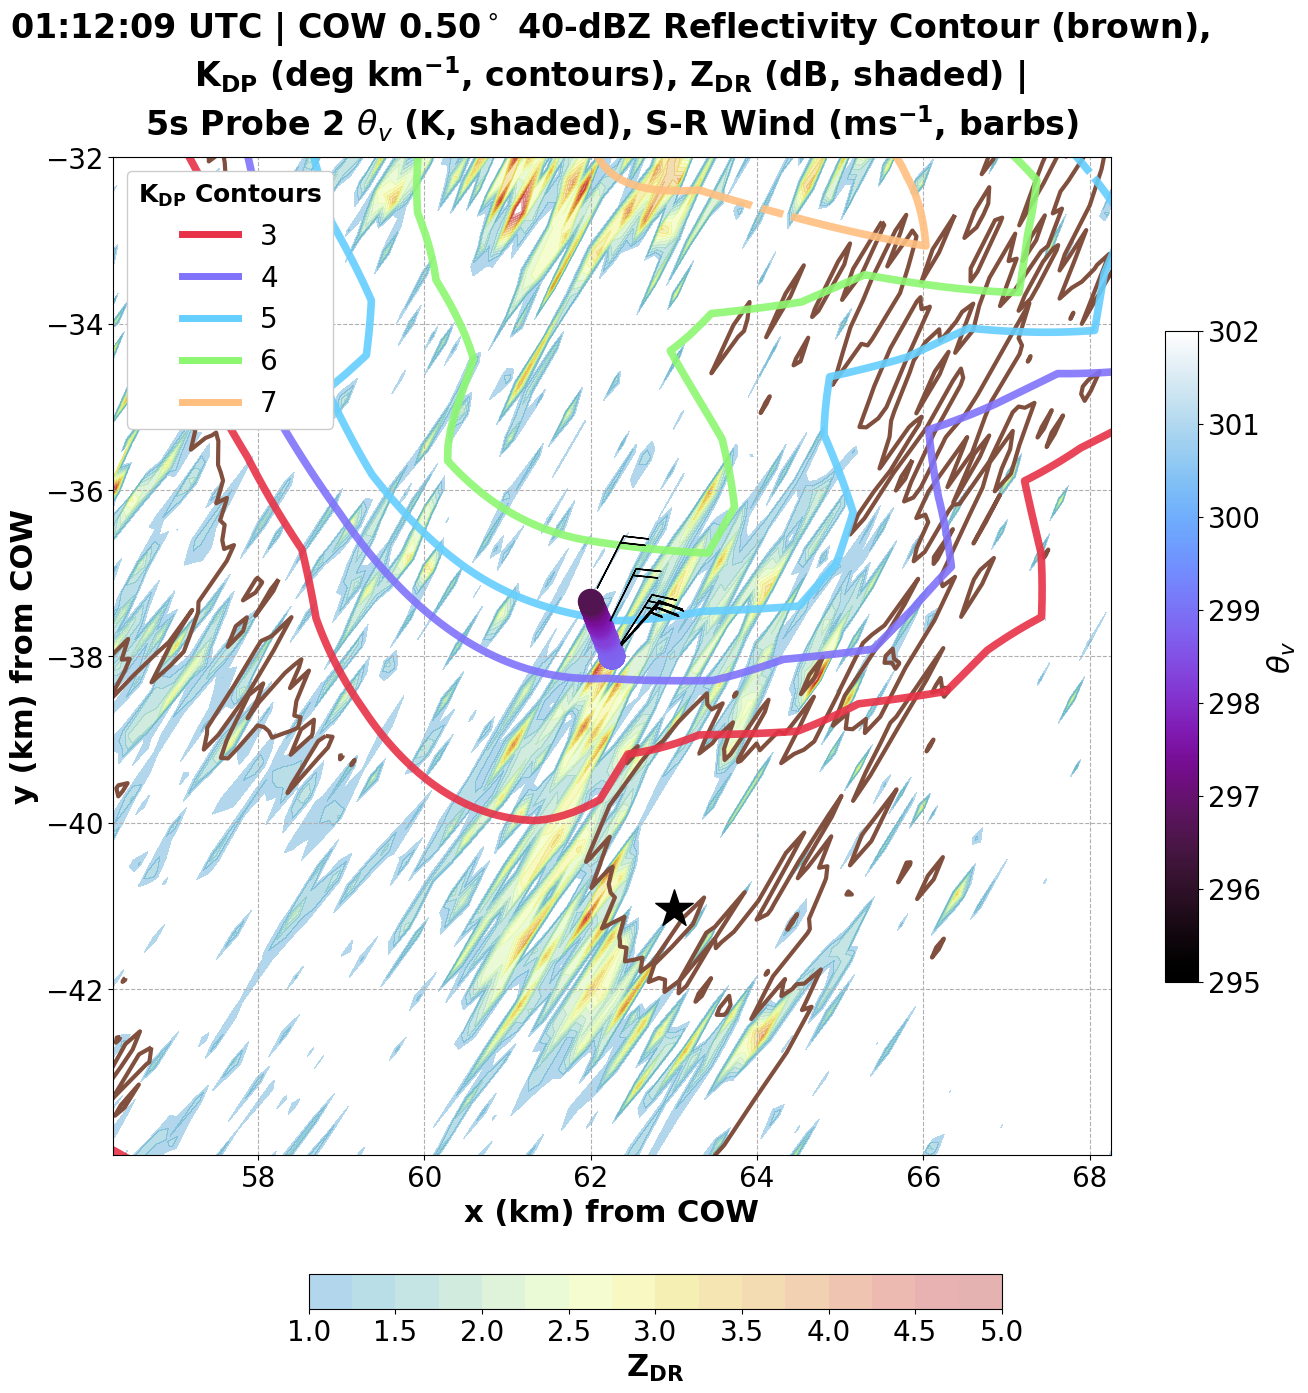

In [42]:
p2_theta_v_magnitudes = p25s['Theta_v'].apply(lambda x: x.magnitude).to_numpy()
p2_u_magnitudes = p25s['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p25s['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()
p2_x_coords = p25s['Longitude']
p2_y_coords = p25s['Latitude']    
directory_path = path + 'Data/COW/'
file_names = os.listdir(directory_path)

file = 'cfrad.20230325_011209.342_COW1_v21_s01_el0.50_SUR.nc'
ztime = file[15:17] + ':' + file[17:19] + ':' + file[19:21]
decimal_time = round((3600*int(file[15:17]) + 60*int(file[17:19]) + int(file[19:21])) / 3600, 7)
idx, =np.where(p25s['Decimal Time'] == decimal_time)
time = idx[0]
dt = 60
elevation_angle = file[41:45]

plat = p2_y_coords[time]
plon = p2_x_coords[time]

if (np.isnan(plat)) or (np.isnan(plon)):
    test = 0

else:

    fig = plt.figure(figsize=[14, 15], layout='constrained')
    plt.tight_layout()

    radar = pyart.io.read(directory_path + file)
    radar.add_field_like("RHOHV","cross_correlation_ratio",radar.fields["RHOHV"]["data"].copy())
    kdp_vulpiani = pyart.retrieve.kdp_vulpiani(radar, windsize = 40, psidp_field = 'PHIDP', 
                   band='C', prefilter_psidp = "cross_correlation_ratio")
    radar.add_field('kdp_vulpiani', kdp_vulpiani[0])

    reflectivity = radar.fields['DBZHCC']['data']
    zdr = radar.fields['ZDRC']['data']
    kdp = radar.fields['kdp_vulpiani']['data']

    range_data = radar.range['data']
    azimuths = radar.azimuth['data']

    r, theta = np.meshgrid(range_data, np.radians(azimuths))
    x = r * np.sin(theta) / 1000
    y = r * np.cos(theta) / 1000

    contours_ref = plt.contour(x, y, reflectivity, levels=[40], 
                               colors = ['#814F3D'], alpha = 1, linewidths = 3)
    contours_zdr = plt.contourf(x, y, zdr, levels=np.arange(1, 5.25, 0.25), 
                                cmap = 'pyart_HomeyerRainbow', alpha = 0.3, linewidths = 3) #turbo
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', 
                                                    ['#e83248', '#8072fb', '#65cfff', '#8cf871', '#ffbf80'])
    contours_kdp = plt.contour(x, y, kdp, levels=np.arange(3, 8, 1), 
                               cmap = custom_cmap, alpha = 0.9, linewidths = 5.5)

    cbar_zdr = plt.colorbar(contours_zdr, fraction = 0.03, 
                            orientation = 'horizontal', shrink = 0.8, pad = 0.1)
    cbar_zdr.set_label('$\mathregular{Z_{DR}}$', size = 22, weight = 'bold')
    cbar_zdr.ax.tick_params(labelsize = 20)

    levels = contours_kdp.levels
    colors = [contours_kdp.cmap(contours_kdp.norm(level)) for level in levels]
    legend_labels = [f'{level:.0f}' for level in levels]
    title_font = FontProperties(size = 18, weight='bold')

    plt.legend(handles=[plt.Line2D([0], [0], linestyle='-', linewidth=5, color=color) for color in colors],
               labels=legend_labels,
               title='$\mathregular{K_{DP}}$ Contours',
               loc='upper left', fontsize = 20, 
               framealpha=1, title_fontproperties=title_font)

    ax = plt.gca()
    sizes = {'width' : 0.3}

    for j in range(time - dt, time + 1 + dt, 1):
        p2_scatter = plt.scatter(p25s['x_wrt_COW'][j], p25s['y_wrt_COW'][j], c = p2_theta_v_magnitudes[j], 
                                  s = 300, cmap = cmasher.voltage, vmin = 295, vmax = 302, zorder = 5) # BrBG, cmasher.voltage
    cbar_thv = plt.colorbar(p2_scatter, fraction = 0.03, pad = 0.05)
    cbar_thv.set_label(r'$\theta$$_{v}$', size = 22, weight = 'bold')
    cbar_thv.ax.tick_params(labelsize = 20)

    for i in range(time - dt, time + 1 + dt, 30):
        p2_stationplot = StationPlot(ax, p25s['x_wrt_COW'][i], p25s['y_wrt_COW'][i], fontsize = 22)
        p2_stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, color = 'black', zorder = 5)

    plt.title(ztime + ' UTC | COW ' + elevation_angle 
              + '$^\circ$ 40-dBZ Reflectivity Contour (brown), ' + '\n' + 
              '$\mathregular{K_{DP}}$ (deg $\mathregular{km^{-1}}$, contours), ' 
              + '$\mathregular{Z_{DR}}$ (dB, shaded) | ' + '\n'   
              + r'5s Probe 2 $\theta$$_{v}$ (K, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)', 
              size = 24, weight = 'bold', pad = 15)

    plt.scatter(p25s['x_meso_wrt_COW'][time], p25s['y_meso_wrt_COW'][time], c = 'black', marker = '*', 
                s = 800, zorder = 5)

    plt.grid(True, linestyle = '--')
    plt.xticks(size = 20)
    plt.yticks(size = 20)

    plt.xlabel('x (km) from COW', size = 22, weight = 'bold')
    plt.ylabel('y (km) from COW', size = 22, weight = 'bold')
    plt.axis('square')
    plt.xlim([p25s['x_wrt_COW'][time] - 6, p25s['x_wrt_COW'][time] + 6])
    plt.ylim([p25s['y_wrt_COW'][time] - 6, p25s['y_wrt_COW'][time] + 6])

In [43]:
## Figure 18 ##

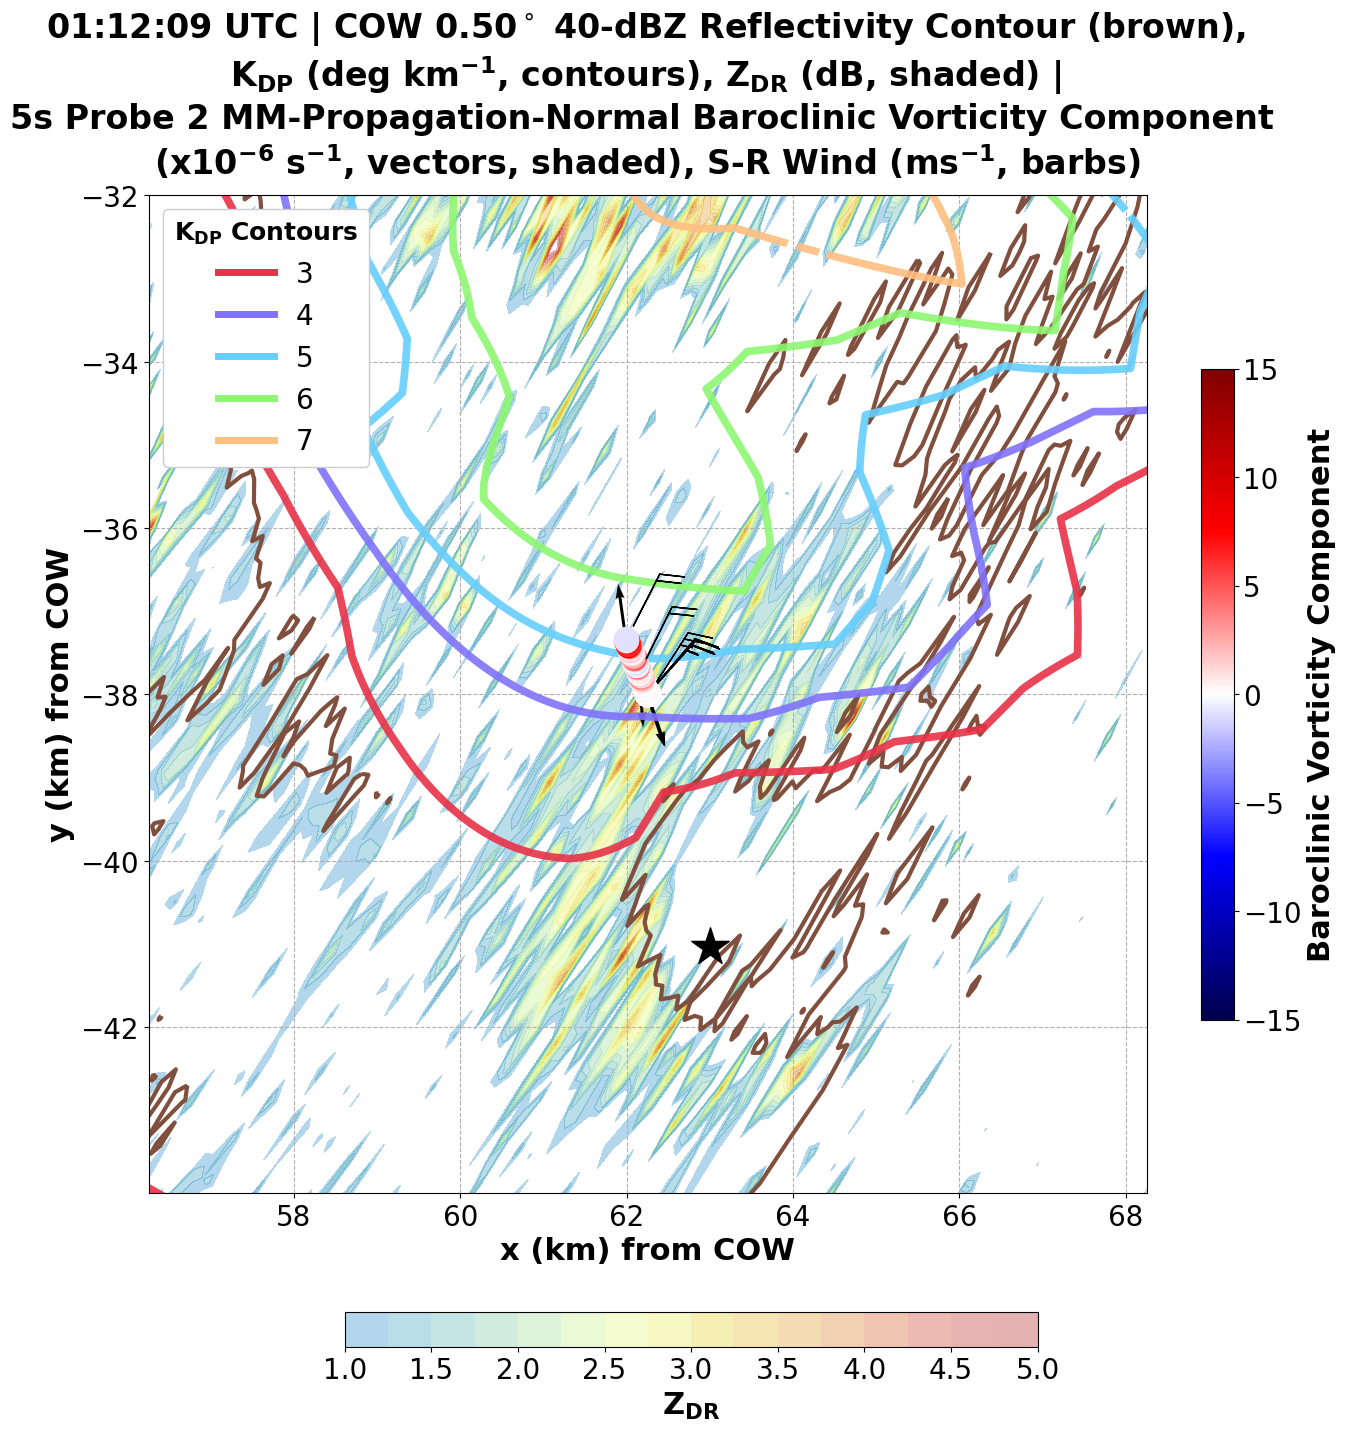

In [44]:
p2_u_magnitudes = p25s['storm_rel_u'].apply(lambda x: x.magnitude).to_numpy()
p2_v_magnitudes = p25s['storm_rel_v'].apply(lambda x: x.magnitude).to_numpy()
p2_baro = (p25s['Baroclinic Generated Vorticity'].apply(lambda x: x.magnitude).to_numpy())*(10**6)
p2_baro_x = p25s['BGV x_comp']
p2_baro_y = p25s['BGV y_comp']
p2_x_coords = p25s['Longitude']
p2_y_coords = p25s['Latitude']    
directory_path = path + 'Data/COW/'
file_names = os.listdir(directory_path)

file = 'cfrad.20230325_011209.342_COW1_v21_s01_el0.50_SUR.nc'
ztime = file[15:17] + ':' + file[17:19] + ':' + file[19:21]
decimal_time = round((3600*int(file[15:17]) + 60*int(file[17:19]) + int(file[19:21])) / 3600, 7)
idx, =np.where(p25s['Decimal Time'] == decimal_time)
time = idx[0]
dt = 60
elevation_angle = file[41:45]

plat = p2_y_coords[time]
plon = p2_x_coords[time]

if (np.isnan(plat)) or (np.isnan(plon)):
    test = 0

else:
    fig = plt.figure(figsize=[14, 15], layout='constrained')
    plt.tight_layout()

    radar = pyart.io.read(directory_path + file)
    radar.add_field_like("RHOHV","cross_correlation_ratio",radar.fields["RHOHV"]["data"].copy())
    kdp_vulpiani = pyart.retrieve.kdp_vulpiani(radar, windsize = 40, psidp_field = 'PHIDP', 
                   band='C', prefilter_psidp = "cross_correlation_ratio")
    radar.add_field('kdp_vulpiani', kdp_vulpiani[0])

    reflectivity = radar.fields['DBZHCC']['data']
    zdr = radar.fields['ZDRC']['data']
    kdp = radar.fields['kdp_vulpiani']['data']

    range_data = radar.range['data']
    azimuths = radar.azimuth['data']

    r, theta = np.meshgrid(range_data, np.radians(azimuths))
    x = r * np.sin(theta) / 1000
    y = r * np.cos(theta) / 1000

    contours_ref = plt.contour(x, y, reflectivity, levels=[40], 
                               colors = ['#814F3D'], alpha = 1, linewidths = 3)
    contours_zdr = plt.contourf(x, y, zdr, levels=np.arange(1, 5.25, 0.25), 
                                cmap = 'pyart_HomeyerRainbow', alpha = 0.3, linewidths = 3) #turbo
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', 
                                                    ['#e83248', '#8072fb', '#65cfff', '#8cf871', '#ffbf80'])
    contours_kdp = plt.contour(x, y, kdp, levels=np.arange(3, 8, 1), 
                               cmap = custom_cmap, alpha = 0.9, linewidths = 5.5)
    
    cbar_zdr = plt.colorbar(contours_zdr, fraction = 0.03, 
                            orientation = 'horizontal', shrink = 0.8, pad = 0.1)
    cbar_zdr.set_label('$\mathregular{Z_{DR}}$', size = 22, weight = 'bold')
    cbar_zdr.ax.tick_params(labelsize = 20)

    levels = contours_kdp.levels
    colors = [contours_kdp.cmap(contours_kdp.norm(level)) for level in levels]
    legend_labels = [f'{level:.0f}' for level in levels]
    title_font = FontProperties(size =18, weight='bold')

    plt.legend(handles=[plt.Line2D([0], [0], linestyle='-', linewidth=5, color=color) for color in colors],
               labels=legend_labels,
               title='$\mathregular{K_{DP}}$ Contours',
               loc='upper left', fontsize = 20, 
               framealpha=1, title_fontproperties=title_font)

    ax = plt.gca()
    sizes = {'width' : 0.3}

    for j in range(time - dt, time + 1 + dt, 1):
        p2_scatter = plt.scatter(p25s['x_wrt_COW'][j], p25s['y_wrt_COW'][j], c = p2_baro[j], 
                                  s = 300, cmap = 'seismic', vmin = -15, vmax = 15, zorder = 5) # BrBG, cmasher.voltage
    cbar_thv = plt.colorbar(p2_scatter, fraction = 0.03, pad = 0.05)
    cbar_thv.set_label('Baroclinic Vorticity Component', size = 22, weight = 'bold')
    cbar_thv.ax.tick_params(labelsize = 20)

    for i in range(time - dt, time + 1 + dt, 30):
        p2_stationplot = StationPlot(ax, p25s['x_wrt_COW'][i], p25s['y_wrt_COW'][i], fontsize = 22)
        p2_stationplot.plot_barb(p2_u_magnitudes[i], p2_v_magnitudes[i], sizes = sizes, color = 'black', zorder = 5)

        x = p25s['x_wrt_COW'][i]
        y = p25s['y_wrt_COW'][i]
        baro_x_i = p2_baro_x[i]
        baro_y_i = p2_baro_y[i]
        plt.quiver(x, y, 
                   baro_x_i/np.abs(p25s['Baroclinic Generated Vorticity'][i]), 
                   baro_y_i/np.abs(p25s['Baroclinic Generated Vorticity'][i]), width = 0.003, 
                   angles = 'xy', scale_units = 'xy')

    plt.title(ztime + ' UTC | COW ' + elevation_angle 
              + '$^\circ$ 40-dBZ Reflectivity Contour (brown), ' + '\n'
              + '$\mathregular{K_{DP}}$ (deg $\mathregular{km^{-1}}$, contours), ' 
              + '$\mathregular{Z_{DR}}$ (dB, shaded) | ' + '\n'       
              + r'5s Probe 2 MM-Propagation-Normal Baroclinic Vorticity Component '
              + '\n' + r'(x$\mathregular{10^{-6}}$ $\mathregular{s^{-1}}}$, vectors, shaded), S-R Wind (m$\mathregular{s^{-1}}$, barbs)', 
              size = 24, weight = 'bold', pad = 15)

    plt.scatter(p25s['x_meso_wrt_COW'][time], p25s['y_meso_wrt_COW'][time], c = 'black', marker = '*', 
                s = 800, zorder = 5)

    plt.grid(True, linestyle = '--')
    plt.xticks(size = 20)
    plt.yticks(size = 20)

    plt.xlabel('x (km) from COW', size = 22, weight = 'bold')
    plt.ylabel('y (km) from COW', size = 22, weight = 'bold')
    plt.axis('square')
    plt.xlim([p25s['x_wrt_COW'][time] - 6, p25s['x_wrt_COW'][time] + 6])
    plt.ylim([p25s['y_wrt_COW'][time] - 6, p25s['y_wrt_COW'][time] + 6])    